## Proyecto

### Contexto y Motivación

### Preguntas Objetivo

### Datos

### EDA

In [142]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

In [143]:
chile_df = pd.read_csv('data/chile.csv',  low_memory=False)
argentina_df = pd.read_csv('data/argentina.csv',  low_memory=False)
antartica_df = pd.read_csv('data/antartica.csv',  low_memory=False)

In [144]:
#info que muestre todos los datos 
chile_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no  

In [145]:
argentina_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [146]:
antartica_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [147]:
columns = [
    'species_name',
    'occurrence_no',
    'accepted_name',
    'early_interval',
    'late_interval',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'lat',
    'lng',
    'diet',
    'life_habit',
    "environment",
    "taxon_environment",
    "primary_name"
]

#Hacer que los df solo tengan las columnas que necesitamos
chile_df = chile_df[columns].copy()
argentina_df = argentina_df[columns].copy()
antartica_df = antartica_df[columns].copy()

In [148]:
obtener_duplicados_chile = chile_df.duplicated(keep=False)
datos_duplicados_chile = chile_df[obtener_duplicados_chile]
datos_duplicados_chile

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [149]:
obtener_duplicados_argentina = argentina_df.duplicated(keep=False)
datos_duplicados_argentina = argentina_df[obtener_duplicados_argentina]
datos_duplicados_argentina

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [150]:
obtener_duplicados_antartica = antartica_df.duplicated(keep=False)
datos_duplicados_antartica = antartica_df[obtener_duplicados_antartica]
datos_duplicados_antartica

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


Notamos que no hay datos duplicados, por ende no es necesario realizar ninguna acción adicional para eliminar duplicados.

In [151]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   early_interval     9481 non-null   object 
 4   late_interval      1605 non-null   object 
 5   phylum             9337 non-null   object 
 6   class              9292 non-null   object 
 7   order              9123 non-null   object 
 8   family             8914 non-null   object 
 9   genus              8574 non-null   object 
 10  lat                9481 non-null   float64
 11  lng                9481 non-null   float64
 12  diet               8749 non-null   object 
 13  life_habit         8743 non-null   object 
 14  environment        9402 non-null   object 
 15  taxon_environment  5847 non-null   object 
 16  primary_name       9481 

In [152]:
argentina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       31881 non-null  object 
 1   occurrence_no      31881 non-null  int64  
 2   accepted_name      31253 non-null  object 
 3   early_interval     31881 non-null  object 
 4   late_interval      5288 non-null   object 
 5   phylum             31226 non-null  object 
 6   class              31038 non-null  object 
 7   order              29738 non-null  object 
 8   family             29056 non-null  object 
 9   genus              27398 non-null  object 
 10  lat                31881 non-null  float64
 11  lng                31881 non-null  float64
 12  diet               24717 non-null  object 
 13  life_habit         22808 non-null  object 
 14  environment        31192 non-null  object 
 15  taxon_environment  18471 non-null  object 
 16  primary_name       318

In [153]:
antartica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       11311 non-null  object 
 1   occurrence_no      11311 non-null  int64  
 2   accepted_name      10977 non-null  object 
 3   early_interval     11311 non-null  object 
 4   late_interval      2888 non-null   object 
 5   phylum             10960 non-null  object 
 6   class              10926 non-null  object 
 7   order              10744 non-null  object 
 8   family             10604 non-null  object 
 9   genus              10375 non-null  object 
 10  lat                11311 non-null  float64
 11  lng                11311 non-null  float64
 12  diet               7706 non-null   object 
 13  life_habit         6012 non-null   object 
 14  environment        10351 non-null  object 
 15  taxon_environment  5410 non-null   object 
 16  primary_name       113

In [154]:
chile_df['era_early'] = None
argentina_df['era_early'] = None
antartica_df['era_early'] = None

In [155]:
chile_df['era_late'] = None
argentina_df['era_late'] = None
antartica_df['era_late'] = None

In [156]:
cambrian_intervals = [
    "Early Terreneuvian", "Middle Terreneuvian", "Late Terreneuvian", "Terreneuvian",
    "Early Series 2", "Middle Series 2", "Late Series 2", "Series 2",
    "Early Miaolingian", "Middle Miaolingian", "Late Miaolingian", "Miaolingian",
    "Early Furongian", "Middle Furongian", "Late Furongian", "Furongian",
    "Early Fortunian", "Middle Fortunian", "Late Fortunian", "Fortunian",
    "Early Stage 2", "Middle Stage 2", "Late Stage 2", "Stage 2",
    "Early Stage 3", "Middle Stage 3", "Late Stage 3", "Stage 3",
    "Early Stage 4", "Middle Stage 4", "Late Stage 4", "Stage 4",
    "Early Wuliuan", "Middle Wuliuan", "Late Wuliuan", "Wuliuan",
    "Early Drumian", "Middle Drumian", "Late Drumian", "Drumian",
    "Early Guzhangian", "Middle Guzhangian", "Late Guzhangian", "Guzhangian",
    "Early Paibian", "Middle Paibian", "Late Paibian", "Paibian",
    "Early Jiangshanian", "Middle Jiangshanian", "Late Jiangshanian", "Jiangshanian",
    "Early Stage 10", "Middle Stage 10", "Late Stage 10", "Stage 10","Middle Cambrian", "Atdabanian",
    "Toyonian", "Botomian", "Early Cambrian", 'Floran', 'Lenian', 'Dresbachian',
    'Dolgellian', 'Merioneth', 'Trempealeauan', 'Idamean',
       'Sunwaptan','St Davids', 'Solvan', 'Dyeran', 'Wonokan',
        'Tulean', 'Blackhillsian'

]


silurian_intervals = [
    "Early Rhuddanian", "Middle Rhuddanian", "Late Rhuddanian", "Rhuddanian",
    "Early Aeronian", "Middle Aeronian", "Late Aeronian", "Aeronian",
    "Early Telychian", "Middle Telychian", "Late Telychian", "Telychian",
    "Early Sheinwoodian", "Middle Sheinwoodian", "Late Sheinwoodian", "Sheinwoodian",
    "Early Homerian", "Middle Homerian", "Late Homerian", "Homerian",
    "Early Gorstian", "Middle Gorstian", "Late Gorstian", "Gorstian",
    "Early Ludfordian", "Middle Ludfordian", "Late Ludfordian", "Ludfordian",
    "Early Llandovery", "Middle Llandovery", "Late Llandovery", "Llandovery",
    "Early Wenlock", "Middle Wenlock", "Late Wenlock", "Wenlock",
    "Early Ludlow", "Middle Ludlow", "Late Ludlow", "Ludlow",
    "Early Pridoli", "Middle Pridoli", "Late Pridoli", "Pridoli"
]


devonian_intervals = [
    "Early Lochkovian", "Middle Lochkovian", "Late Lochkovian", "Lochkovian",
    "Early Pragian", "Middle Pragian", "Late Pragian", "Pragian",
    "Early Emsian", "Middle Emsian", "Late Emsian", "Emsian",
    "Early Eifelian", "Middle Eifelian", "Late Eifelian", "Eifelian",
    "Early Givetian", "Middle Givetian", "Late Givetian", "Givetian",
    "Early Fransnian", "Middle Fransnian", "Late Fransnian", "Fransnian",
    "Early Famennian", "Middle Famennian", "Late Famennian", "Famennian",
    "Early Devonian", "Middle Devonian", "Late Devonian"
]


carboniferous_intervals = [
    "Early Tournaisian", "Middle Tournaisian", "Late Tournaisian", "Tournaisian",
    "Early Visean", "Middle Visean", "Late Visean", "Visean",
    "Early Serpukhovian", "Middle Serpukhovian", "Late Serpukhovian", "Serpukhovian",
    "Early Bashkirian", "Middle Bashkirian", "Late Bashkirian", "Bashkirian",
    "Early Moscovian", "Middle Moscovian", "Late Moscovian", "Moscovian",
    "Early Kasimovian", "Middle Kasimovian", "Late Kasimovian", "Kasimovian",
    "Early Gzhelian", "Middle Gzhelian", "Late Gzhelian", "Gzhelian",
    "Early Mississippian", "Middle Mississippian", "Late Mississippian", "Mississippian",
    "Early Pennsylvanian", "Middle Pennsylvanian", "Late Pennsylvanian", "Pennsylvanian",
    'Namurian', 'Virgilian', "Arnsbergian", 
]

permian_intervals = [
    "Early Asselian", "Middle Asselian", "Late Asselian", "Asselian",
    "Early Sakmarian", "Middle Sakmarian", "Late Sakmarian", "Sakmarian",
    "Early Artinskian", "Middle Artinskian", "Late Artinskian", "Artinskian",
    "Early Kungurian", "Middle Kungurian", "Late Kungurian", "Kungurian",
    "Early Roadian", "Middle Roadian", "Late Roadian", "Roadian",
    "Early Wordian", "Middle Wordian", "Late Wordian", "Wordian",
    "Early Capitanian", "Middle Capitanian", "Late Capitanian", "Capitanian",
    "Early Wuchiapingian", "Middle Wuchiapingian", "Late Wuchiapingian", "Wuchiapingian",
    "Early Changhsingian", "Middle Changhsingian", "Late Changhsingian", "Changhsingian",
    "Early Cisuralian", "Middle Cisuralian", "Late Cisuralian", "Cisuralian",
    "Early Guadalupian", "Middle Guadalupian", "Late Guadalupian", "Guadalupian",
    "Early Lopingian", "Middle Lopingian", "Late Lopingian", "Lopingian"
]


ordovician_intervals = [
    "Early Ordovician", "Middle Ordovician", "Late Ordovician",
    "Early Tremadocian", "Middle Tremadocian", "Late Tremadocian", "Tremadocian",
    "Early Floian", "Middle Floian", "Late Floian", "Floian",
    "Early Dapingian", "Middle Dapingian", "Late Dapingian", "Dapingian",
    "Early Darriwilian", "Middle Darriwilian", "Late Darriwilian", "Darriwilian",
    "Early Sandbian", "Middle Sandbian", "Late Sandbian", "Sandbian",
    "Early Katian", "Middle Katian", "Late Katian", "Katian",
    "Early Hirnantian", "Middle Hirnantian", "Late Hirnantian", "Hirnantian",
    'Arenig', 'Early Llanvirn', 'Ibex', 'Tremadoc', 'Llanvirn', 'Gisbornian',
    'Caradoc', 'Early Llandeilo','Costonian', 'Actonian', 'Late Llandeilo',
    'Longvillian', 'Llandeilo', 'Arenigian', 'Late Llanvirn', 'Whiterockian',
    'Skullrockian', 'Stairsian'
]

triassic_intervals = [
    "Early Induan", "Middle Induan", "Late Induan", "Induan",
    "Early Anisian", "Middle Anisian", "Late Anisian", "Anisian",
    "Early Ladinian", "Middle Ladinian", "Late Ladinian", "Ladinian",
    "Early Carnian", "Middle Carnian", "Late Carnian", "Carnian",
    "Early Norian", "Middle Norian", "Late Norian", "Norian",
    "Early Rhaetian", "Middle Rhaetian", "Late Rhaetian", "Rhaetian",
    "Early Triassic", "Middle Triassic", "Late Triassic", 'Sevatian',
    'Olenekian', 'Longobardian'
]


neogene_intervals = [
    "Early Miocene", "Middle Miocene", "Late Miocene", "Miocene",
    "Early Pliocene", "Middle Pliocene", "Late Pliocene", "Pliocene",
    "Early Aquitanian", "Middle Aquitanian", "Late Aquitanian", "Aquitanian",
    "Early Burdigalian", "Middle Burdigalian", "Late Burdigalian", "Burdigalian",
    "Early Langhian", "Middle Langhian", "Late Langhian", "Langhian",
    "Early Serrevallian", "Middle Serrevallian", "Late Serrevallian", "Serrevallian",
    "Early Tortonian", "Middle Tortonian", "Late Tortonian", "Tortonian",
    "Early Messinian", "Middle Messinian", "Late Messinian", "Messinian",
    "Early Zanclean", "Middle Zanclean", "Late Zanclean", "Zanclean",
    "Early Piacenzian", "Middle Piacenzian", "Late Piacenzian", "Piacenzian",
    'Serravallian', 'Colhuehuapian', 'Santacrucian','Friasian',
    'Chasicoan', 'Montehermosan', 'Huayquerian', 'Chapadmalalan',
    'Colloncuran', 'Mayoan'
]


quaternary_intervals = [
    "Early Pleistocene", "Middle Pleistocene", "Late Pleistocene", "Pleistocene",
    "Early Gelasian", "Middle Gelasian", "Late Gelasian", "Gelasian",
    "Early Calabrian", "Middle Calabrian", "Late Calabrian", "Calabrian",
    "Early Chibanian", "Middle Chibanian", "Late Chibanian", "Chibanian",
    'Holocene', 'Lujanian', 'Ensenadan', 'Ionian', 'Uquian'
]


jurassic_intervals = [
    "Early Hettangian", "Middle Hettangian", "Late Hettangian", "Hettangian",
    "Early Sinemurian", "Middle Sinemurian", "Late Sinemurian", "Sinemurian",
    "Early Pliensbachian", "Middle Pliensbachian", "Late Pliensbachian", "Pliensbachian",
    "Early Toarcian", "Middle Toarcian", "Late Toarcian", "Toarcian",
    "Early Aalenian", "Middle Aalenian", "Late Aalenian", "Aalenian",
    "Early Bajocian", "Middle Bajocian", "Late Bajocian", "Bajocian",
    "Early Bathonian", "Middle Bathonian", "Late Bathonian", "Bathonian",
    "Early Callovian", "Middle Callovian", "Late Callovian", "Callovian",
    "Early Oxfordian", "Middle Oxfordian", "Late Oxfordian", "Oxfordian",
    "Early Kimmeridgian", "Middle Kimmeridgian", "Late Kimmeridgian", "Kimmeridgian",
    "Early Tithonian", "Middle Tithonian", "Late Tithonian", "Tithonian",
    "Early Jurassic", "Middle Jurassic", "Late Jurassic", 'Planorbis',
    'Margaritatus', 'Variabilis', 'Opalinum','Angulata', 'Obtusum',
    'Falciferum', 'Bifrons', 'Murchisonae', 'Jamesoni', 'Spinatum',
    'Davoei', 'Liasicus', 'Bucklandi', 'Concavum'
]


paleogene_intervals = [
    "Early Paleocene", "Middle Paleocene", "Late Paleocene", "Paleocene",
    "Early Eocene", "Middle Eocene", "Late Eocene", "Eocene",
    "Early Oligocene", "Middle Oligocene", "Late Oligocene", "Oligocene",
    "Early Danian", "Middle Danian", "Late Danian", "Danian",
    "Early Selandian", "Middle Selandian", "Late Selandian", "Selandian",
    "Early Thanetian", "Middle Thanetian", "Late Thanetian", "Thanetian",
    "Early Ypresian", "Middle Ypresian", "Late Ypresian", "Ypresian",
    "Early Lutetian", "Middle Lutetian", "Late Lutetian", "Lutetian",
    "Early Bartonian", "Middle Bartonian", "Late Bartonian", "Bartonian",
    "Early Priabonian", "Middle Priabonian", "Late Priabonian", "Priabonian",
    "Early Rupelian", "Middle Rupelian", "Late Rupelian", "Rupelian",
    "Early Chattian", "Middle Chattian", "Late Chattian", "Chattian",
    'Casamayoran', 'Tinguirirican', 'Riochican', 'Deseadan', 'Mustersan',
    'Divisaderan'
]

cretaceous_intervals = [
    "Early Berriasian", "Middle Berriasian", "Late Berriasian", "Berriasian",
    "Early Valanginian", "Middle Valanginian", "Late Valanginian", "Valanginian",
    "Early Hauterivian", "Middle Hauterivian", "Late Hauterivian", "Hauterivian",
    "Early Barremian", "Middle Barremian", "Late Barremian", "Barremian",
    "Early Aptian", "Middle Aptian", "Late Aptian", "Aptian",
    "Early Albian", "Middle Albian", "Late Albian", "Albian",
    "Early Cenomanian", "Middle Cenomanian", "Late Cenomanian", "Cenomanian",
    "Early Turonian", "Middle Turonian", "Late Turonian", "Turonian",
    "Early Coniacian", "Middle Coniacian", "Late Coniacian", "Coniacian",
    "Early Santonian", "Middle Santonian", "Late Santonian", "Santonian",
    "Early Campanian", "Middle Campanian", "Late Campanian", "Campanian",
    "Early Maastrichtian", "Middle Maastrichtian", "Late Maastrichtian", "Maastrichtian",
    "Early Cretaceous", "Late Cretaceous", 'Neocomian','Senonian'
]

ediacaran_intervals = ["Ediacaran"]

cryogenian_intervals = ["Cryogenian"]

tonian_intervals = ["Tonian"]

siderian_intervals = ["Siderian"]
rhyacian_intervals = ["Rhyacian"]
orosirian_intervals = ["Orosirian"]
statherian_intervals = ["Statherian"]
calymmian_intervals = ["Calymmian"]
ectasian_intervals = ["Ectasian"]
stenian_intervals = ["Stenian"]

nan = [np.nan]

In [157]:
def assign_era(row):
    if row['early_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['early_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['early_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['early_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['early_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['early_interval'] in permian_intervals:
        return 'Permian'
    elif row['early_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['early_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['early_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['early_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['early_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['early_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['early_interval'] in nan:
        return "No especificado"
    else:
        return row['early_interval']

In [158]:
def assign_era_late(row):
    if row['late_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['late_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['late_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['late_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['late_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['late_interval'] in permian_intervals:
        return 'Permian'
    elif row['late_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['late_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['late_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['late_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['late_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['late_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['late_interval'] in nan:
        return "No especificado"
    else:
        return row['late_interval']

In [159]:
chile_df['era_early'] = chile_df.apply(assign_era, axis=1)
argentina_df['era_early'] = argentina_df.apply(assign_era, axis=1)
antartica_df['era_early'] = antartica_df.apply(assign_era, axis=1)

In [160]:
chile_df['era_late'] = chile_df.apply(assign_era_late, axis=1)
argentina_df['era_late'] = argentina_df.apply(assign_era_late, axis=1)
antartica_df['era_late'] = antartica_df.apply(assign_era_late, axis=1)

In [161]:
chile_df.head()

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,ceciliana,16417,Leionucula,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado
1,amuriensis,16418,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
2,cuneiformis,16419,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
3,levitestata,16420,Yoldia,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.0,-73.0,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado
4,pencana,16421,Neiloides,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.0,-73.0,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado


In [162]:
argentina_df.head()

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,sp.,17744,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-39.0,-69.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
1,rocana,17745,Cucullaea,Maastrichtian,NaN,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-39.0,-69.0,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado
2,feruglioli,17746,Glycymerita,Maastrichtian,NaN,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
3,sp.,17747,Glycymerita,Maastrichtian,NaN,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
4,mechanquilensis,17748,Inoceramus,Maastrichtian,NaN,Mollusca,Bivalvia,Myalinida,Inoceramidae,Inoceramus,-39.0,-69.0,suspension feeder,epifaunal,NaN,NaN,Inoceramus,Cretaceous,No especificado


In [163]:
antartica_df.head()

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,rossiana,16484,Solemya,Maastrichtian,NaN,Mollusca,Bivalvia,Solemyida,Solemyidae,Solemya,-64.0,-57.0,"deposit feeder, chemosymbiotic",deep infaunal,NaN,"lagoonal,coastal,inner shelf,outer shelf,oceanic",Solemya,Cretaceous,No especificado
1,suboblonga,16485,Nucula (Leionucula) suboblonga,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-64.0,-57.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado
2,nordenskjoldi,16486,Nordenskjoeldia,Maastrichtian,NaN,Mollusca,Bivalvia,Arcida,Parallelodontidae,Nordenskjoeldia,-64.0,-57.0,suspension feeder,low-level epifaunal,NaN,NaN,Nordenskjoeldia,Cretaceous,No especificado
3,oliveroi,16487,NaN,Maastrichtian,NaN,NaN,NaN,NaN,NaN,NaN,-64.0,-57.0,NaN,NaN,NaN,NaN,Austrocucullaea,Cretaceous,No especificado
4,antarctica,16488,Cucullaea antarctica,Maastrichtian,NaN,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-64.0,-57.0,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado


### Analisis 

## ¿Cuáles son las especies fósiles más comunes en cada una de las tres regiones (Chile, Argentina y Antártida)?

### Chile


C:\Users\octah\AppData\Local\Temp\ipykernel_16324\1417058222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')


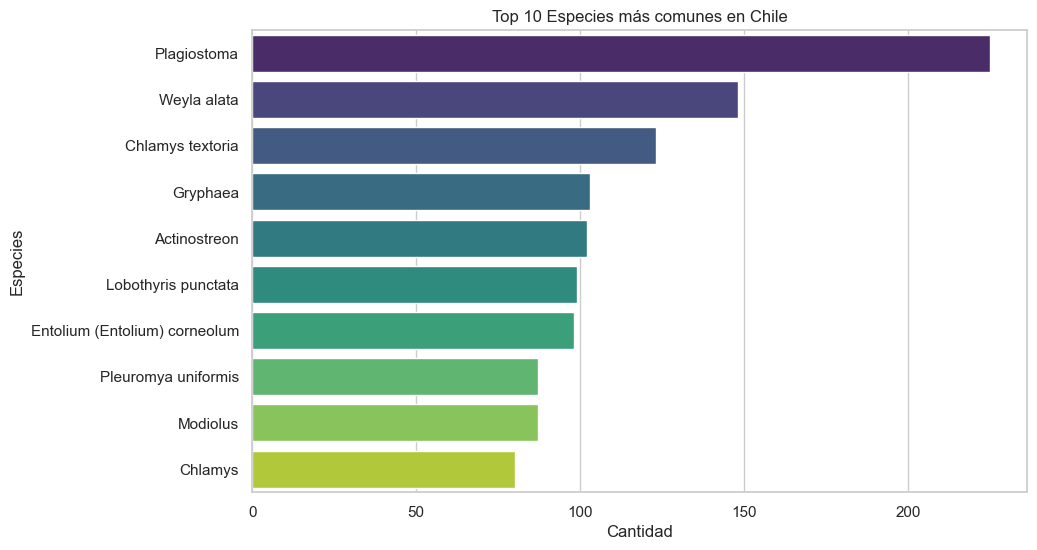

In [164]:
#Hagamos un grafico con las top 10 especies mas comunes en cada region

top_10_especies_chile = chile_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Chile')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()




### Argentina


C:\Users\octah\AppData\Local\Temp\ipykernel_16324\3176372099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')


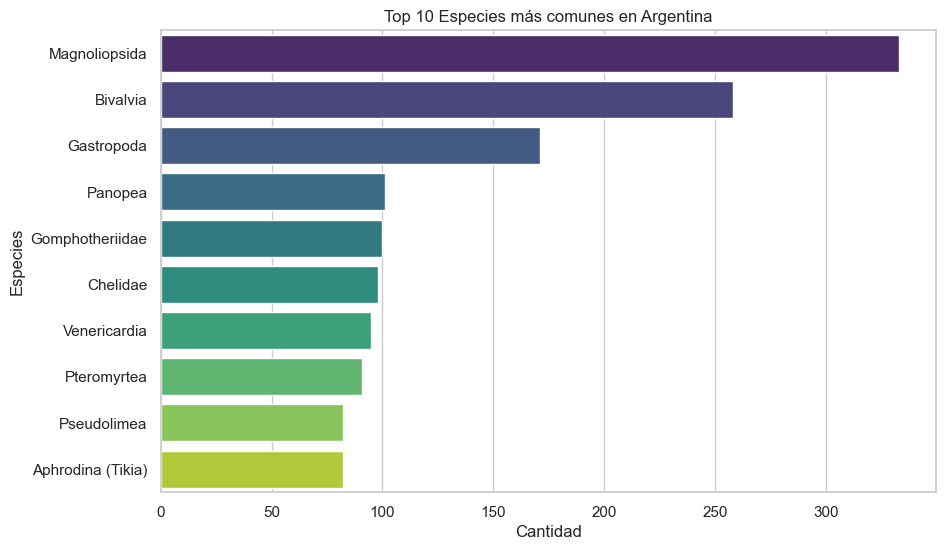

In [165]:
top_10_especies_argentina = argentina_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Argentina')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

### Antártida

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\1893660038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')


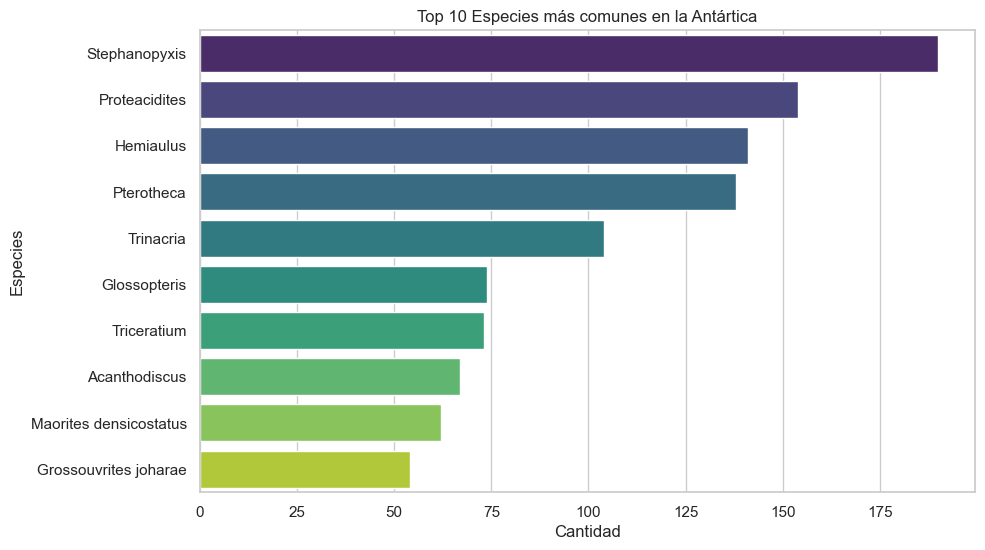

In [166]:
top_10_especies_antartica = antartica_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')
plt.title('Top 10 Especies más comunes en la Antártica')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

###  **Comparación de las especies fósiles más comunes entre regiones**

### **Enfoque del análisis**
Para identificar similitudes y diferencias entre las especies fósiles más comunes en Chile, Argentina y Antártida, realizaremos una comparación basada en sus características taxonómicas y ambientales.

### **Aspectos a comparar**
1. **Ambiente (`environment`)**:
   - Analizaremos en qué tipo de ambiente (acuático, terrestre, marino, etc.) se encuentran las especies más comunes en cada región.
   - Esto nos ayudará a entender la distribución ecológica y los hábitats predominantes en cada región.

2. **Familia (`family`)**:
   - Compararemos las familias a las que pertenecen las especies más comunes, para identificar si hay similitudes en términos de taxonomía general entre las regiones.

3. **Género (`genus`)**:
   - Evaluaremos si las especies más comunes pertenecen a géneros similares, lo que indicaría una conexión taxonómica más específica entre las regiones.

4. **Orden (`order`)**:
   - Investigaremos si las especies más comunes comparten un orden similar, proporcionando un nivel intermedio de comparación taxonómica entre las familias y las clases.

5. **Clase (`class`)**:
   - Examinaremos si las especies más comunes pertenecen a las mismas clases, lo que indicaría similitudes más amplias entre los grupos taxonómicos.

6. **Filo (`phylum`)**:
   - Compararemos los filos a los que pertenecen las especies más comunes, para observar patrones a un nivel taxonómico más general.

7. **Distribución por era (`era_early`)**:
   - Compararemos cómo se distribuyen las especies más comunes a lo largo de las eras geológicas, para identificar si hay eras dominantes en cada región.

---

Antes importante recordar los niveles taxonomicos

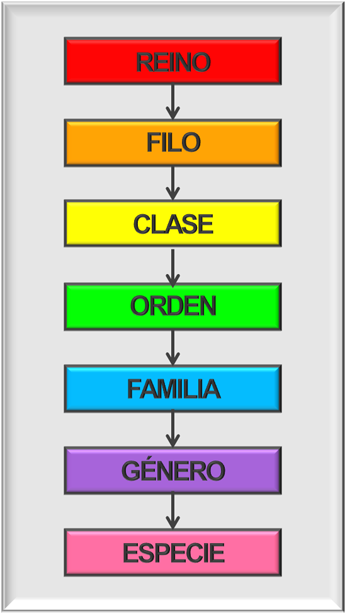

In [167]:
from IPython.display import Image
Image(filename=r'data\img\tax.png')

### **Ambiente (`environment`)**

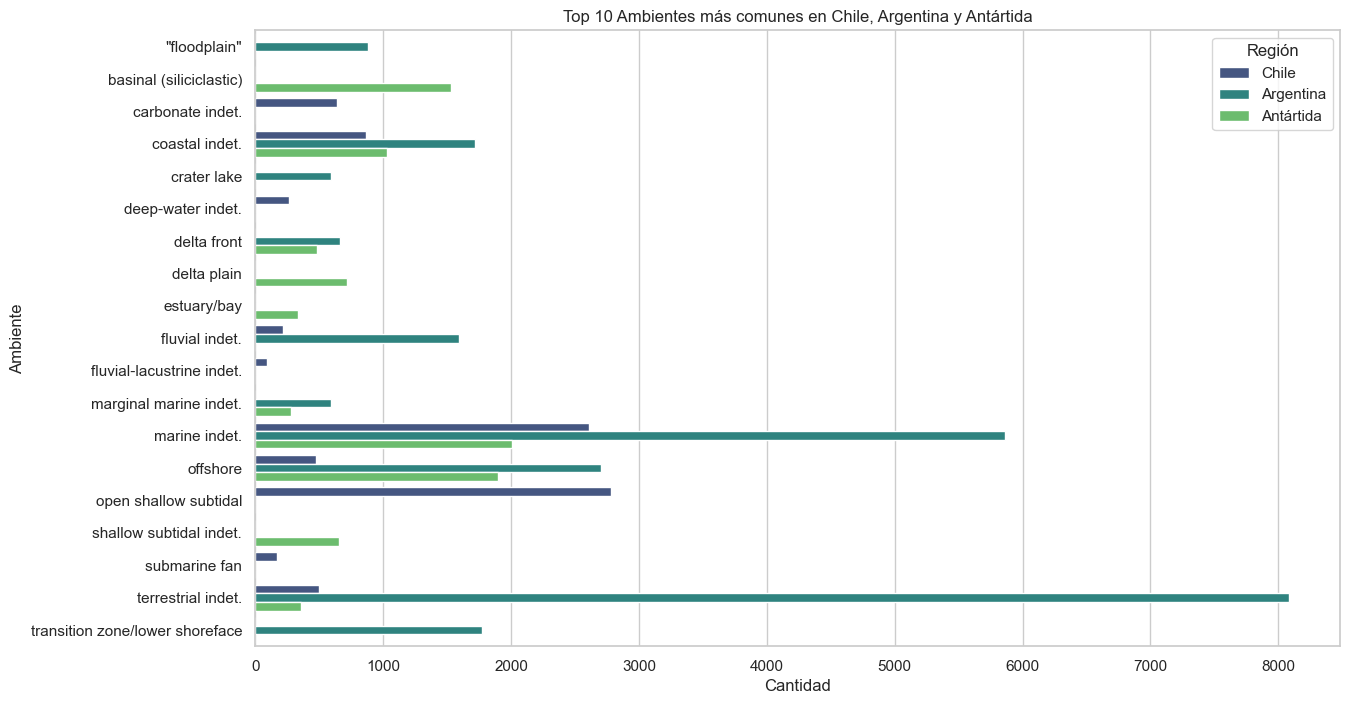

In [168]:
#Ahora hagamos un grafico comparativo de las 10 especies mas comunes en cada region pero con enfoque en enviroment

# Obtener los top 10 ambientes más comunes en cada región
top_10_especies_chile_enviroment = chile_df['environment'].value_counts().head(10)
top_10_especies_argentina_enviroment = argentina_df['environment'].value_counts().head(10)
top_10_especies_antartica_enviroment = antartica_df['environment'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_enviroment,
    'Argentina': top_10_especies_argentina_enviroment,
    'Antártida': top_10_especies_antartica_enviroment
}).fillna(0)



# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='environment', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='environment', hue='Región', palette='viridis')
plt.title('Top 10 Ambientes más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Ambiente')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Predominio de ambientes acuáticos**:
   - La mayoría de las especies fósiles más comunes en las tres regiones están asociadas a ambientes acuáticos, como *marine indet.*, *offshore*, y *open shallow subtidal*. 
   - Esto sugiere que los ecosistemas acuáticos han sido un entorno dominante para la preservación y evolución de la biodiversidad fósil en estas regiones.

2. **Diferencias entre regiones**:
   - **Argentina** muestra una alta proporción de especies asociadas a ambientes *fluvial indet.* y *terrestrial indet.*, indicando una mayor diversidad de ambientes continentales.
   - **Chile** tiene una dominancia notable en ambientes *marine indet.* y *offshore*, lo que refuerza su orientación hacia ecosistemas marinos.
   - **Antártida** presenta una contribución más equilibrada, aunque con mayor énfasis en ambientes como *marginal marine indet.* y *offshore*, lo que podría reflejar su pasado geológico vinculado a mares someros.

3. **Importancia de ambientes transicionales**:
   - En todas las regiones, ambientes como *transition zone/lower shoreface* y *marginal marine indet.* destacan como importantes para la biodiversidad fósil, representando ecosistemas transicionales entre lo marino y lo continental.

4. **Conclusión general**:
   - La predominancia de ambientes acuáticos destaca la importancia de estos ecosistemas en la preservación fósil, pero también refleja las diferencias ecológicas y geográficas particulares de cada región.


### **Género (`genus`)**

In [169]:
chile_df_genus = chile_df[chile_df['genus'] != 'NO_GENUS_SPECIFIED']
argentina_df_genus = argentina_df[argentina_df['genus'] != 'NO_GENUS_SPECIFIED']
antartica_df_genus = antartica_df[antartica_df['genus'] != 'NO_GENUS_SPECIFIED']

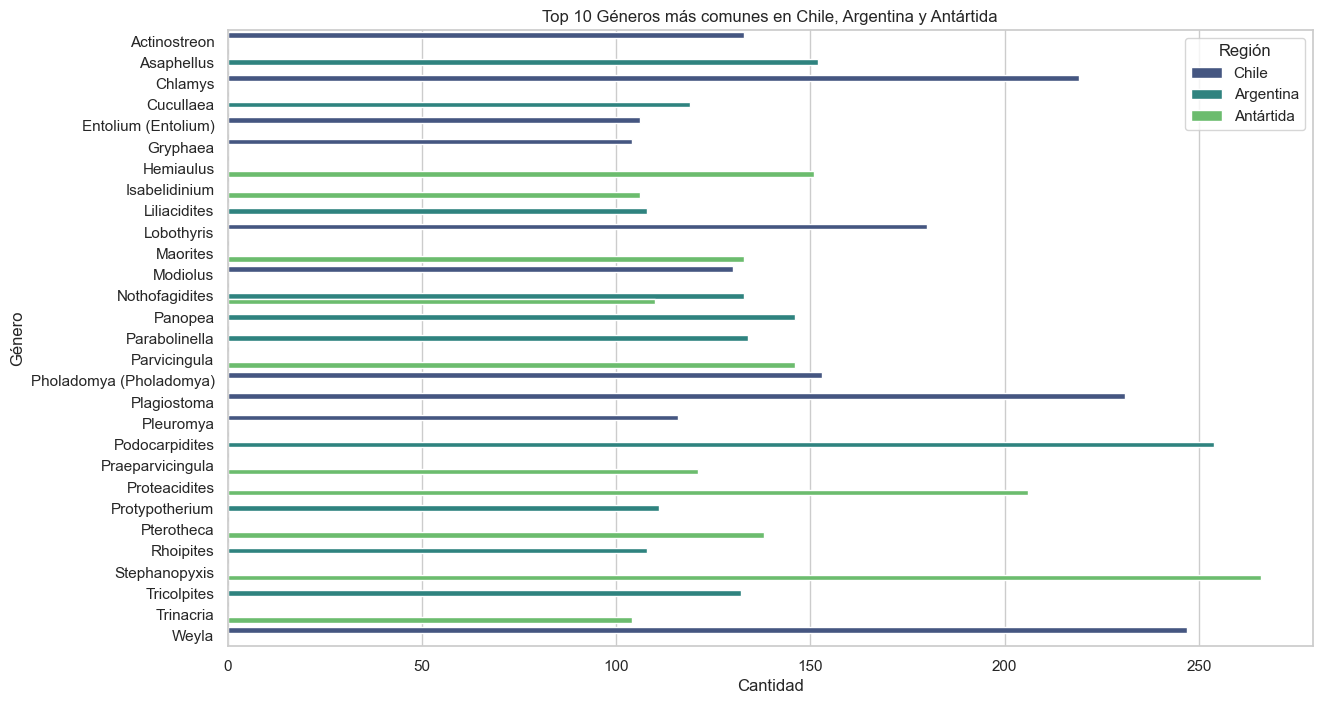

In [170]:
#Ahora hagaos lo mismo pero con genus

# Obtener los top 10 generos más comunes en cada región
top_10_especies_chile_genus = chile_df_genus['genus'].value_counts().head(10)
top_10_especies_argentina_genus = argentina_df_genus['genus'].value_counts().head(10)
top_10_especies_antartica_genus = antartica_df_genus['genus'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_genus,
    'Argentina': top_10_especies_argentina_genus,
    'Antártida': top_10_especies_antartica_genus
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='genus', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='genus', hue='Región', palette='viridis')
plt.title('Top 10 Géneros más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Géneros compartidos entre regiones**:
   - **Argentina y Antártida**:
     - *Nothofagidites* (restos de polen de Nothofagus, "árboles de haya del sur"): Representa ecosistemas terrestres con conexión evolutiva en áreas del hemisferio sur, destacando en ambientes fríos o templados.

2. **Géneros más abundantes por región**:
   - **Argentina**:
     - *Proteacidites* (restos de polen de la familia Proteaceae): Asociados a ecosistemas terrestres templados y secos.
     - *Parvicinctula* (microalgas diatomeas): Indicadoras de ambientes marinos y lacustres.
   - **Chile**:
     - *Pholadomya* (moluscos bivalvos fósiles): Representativos de ecosistemas marinos profundos y estuarios.
     - *Lobothyris* (braquiópodos marinos con conchas): Comunes en ambientes marinos.
   - **Antártida**:
     - *Trinacria* (diatomeas fósiles): Indicadoras de aguas frías y ricas en nutrientes.
     - *Stephanozyxis* (microalgas diatomeas): Asociadas a ambientes marinos polares.

3. **Patrones generales**:
   - Argentina y Antártida comparten *Nothofagidites*, reflejando una conexión evolutiva en ecosistemas terrestres dominados por Nothofagus en el pasado.
   - Chile se diferencia por géneros predominantemente marinos, mientras que Argentina combina géneros terrestres y acuáticos, y Antártida se especializa en microalgas marinas adaptadas al frío.

4. **Conclusión general**:
   - La distribución de géneros resalta las características ecológicas únicas de cada región: ecosistemas marinos profundos en Chile, una mezcla de terrestres y marinos en Argentina, y una dominancia de géneros adaptados al frío en Antártida.


### **Familia (`family`)**

In [171]:
#Primero dropiemos aquellas columnas con NO_FAMILY_SPECIFIED pero usando df nuevos para no modificar los originales

chile_df_family = chile_df[chile_df['family'] != 'NO_FAMILY_SPECIFIED']
argentina_df_family = argentina_df[argentina_df['family'] != 'NO_FAMILY_SPECIFIED']
antartica_df_family = antartica_df[antartica_df['family'] != 'NO_FAMILY_SPECIFIED']


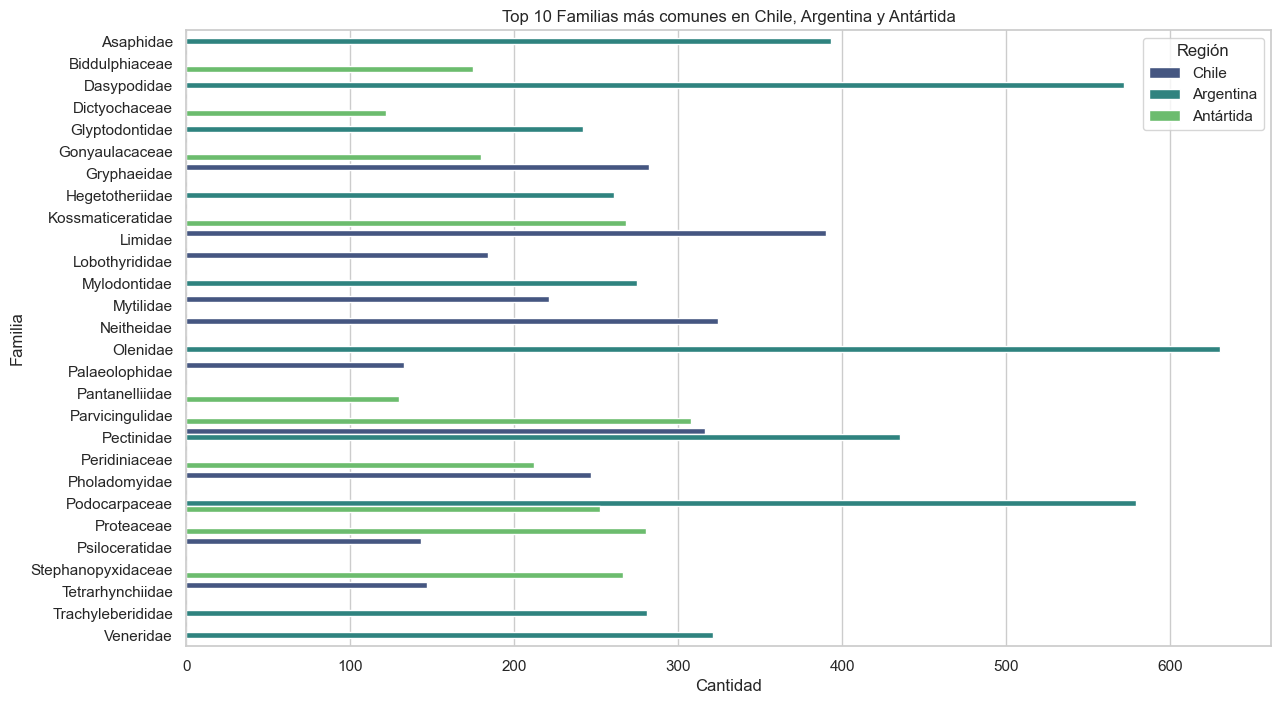

In [172]:
#Ahora hagamos lo mismo pero con familia

# Obtener los top 10 familias más comunes en cada región
top_10_especies_chile_family = chile_df_family['family'].value_counts().head(10)
top_10_especies_argentina_family = argentina_df_family['family'].value_counts().head(10)
top_10_especies_antartica_family = antartica_df_family['family'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_family,
    'Argentina': top_10_especies_argentina_family,
    'Antártida': top_10_especies_antartica_family
}).fillna(0)


# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='family', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='family', hue='Región', palette='viridis')
plt.title('Top 10 Familias más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Familia')
plt.legend(title='Región')
plt.show()

### Observaciones


1. **Familias compartidas entre las regiones**:
   - **Argentina y Antártida**:
     - *Podocarpaceae* (plantas gimnospermas como los pinos): Asociadas a ecosistemas terrestres fríos y templados. Reflejan la conexión evolutiva en ecosistemas terrestres del hemisferio sur.
   - **Chile y Argentina**:
     - *Pectinidae* (moluscos bivalvos como vieiras): Comunes en ambientes marinos someros y costeros, reflejando la importancia de ecosistemas acuáticos compartidos.

2. **Familias con alta abundancia en cada región**:
   - **Argentina**:
     - *Podocarpaceae* (plantas gimnospermas como los pinos): Alta representación en ecosistemas terrestres.
     - *Proteaceae* (plantas angiospermas como proteas): Indicativas de ecosistemas áridos o templados.
   - **Chile**:
     - *Lobothyrididae* (braquiópodos marinos con conchas): Característicos de ambientes marinos profundos.
     - *Limidae* (ostras de fuego, moluscos bivalvos): Muy abundantes en aguas marinas poco profundas.
   - **Antártida**:
     - *Dictyochaecae* (microalgas silíceas): Indicadoras de aguas frías y ricas en nutrientes.
     - *Pantanelliidae* (radiolarios, microfósiles marinos): Asociados a profundidades marinas frías.


4. **Conclusión general**:
   - Las familias compartidas, como *Podocarpaceae* entre Argentina y Antártida y *Pectinidae* entre Chile y Argentina, reflejan conexiones evolutivas específicas y ecosistemas comunes.
   - Las diferencias en las familias más abundantes destacan la diversidad ecológica y geográfica de cada región: ambientes terrestres predominan en Argentina, ecosistemas marinos son clave en Chile, y Antártida muestra un equilibrio entre ecosistemas marinos y lacustres.


### **Orden (`order`)**

In [173]:

chile_df_order = chile_df[chile_df['order'] != 'NO_ORDER_SPECIFIED']
argentina_df_order = argentina_df[argentina_df['order'] != 'NO_ORDER_SPECIFIED']
antartica_df_order = antartica_df[antartica_df['order'] != 'NO_ORDER_SPECIFIED']

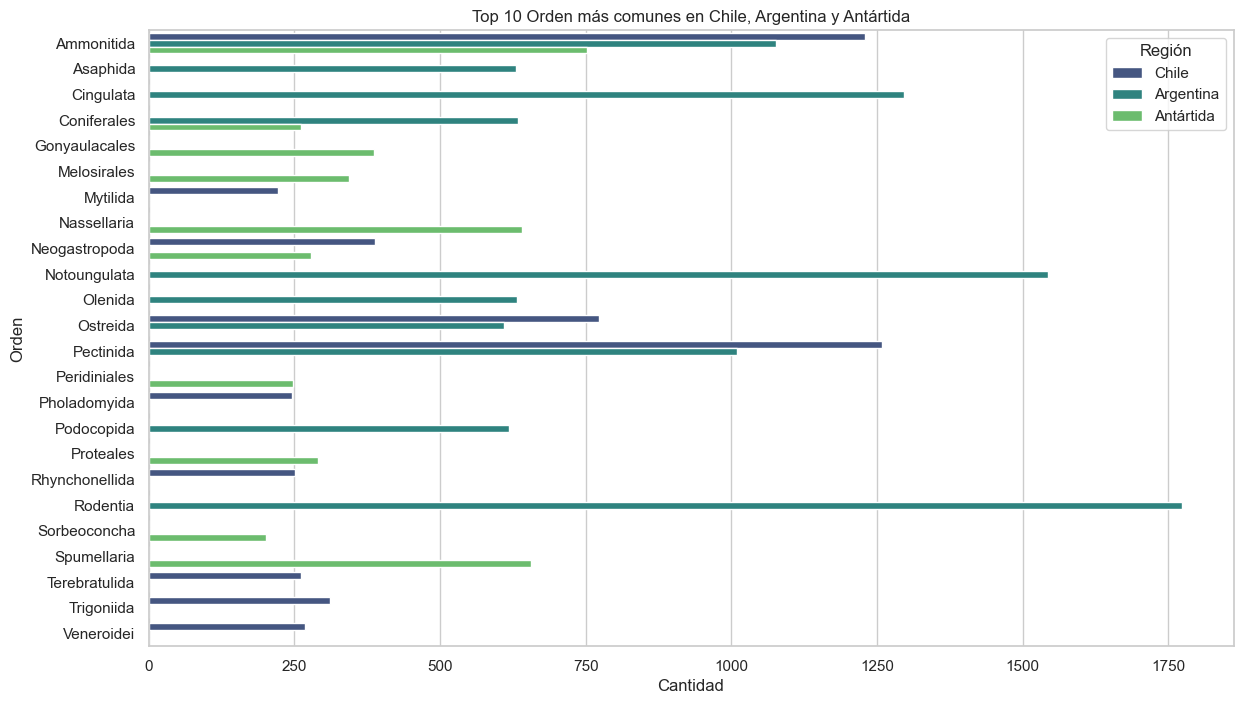

In [174]:
#Hagamos lo mismo para order
#Primero dropiemos aquellas columnas con NO_ORDER_SPECIFIED pero usando df nuevos para no modificar los originales


# Obtener los top 10 order más comunes en cada región
top_10_especies_chile_order = chile_df_order['order'].value_counts().head(10)
top_10_especies_argentina_order = argentina_df_order['order'].value_counts().head(10)
top_10_especies_antartica_order = antartica_df_order['order'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_order,
    'Argentina': top_10_especies_argentina_order,
    'Antártida': top_10_especies_antartica_order
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='order', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='order', hue='Región', palette='viridis')
plt.title('Top 10 Orden más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Orden')
plt.legend(title='Región')
plt.show()




### Observaciones

1. **Órdenes compartidos entre regiones**:
   - *Ammonitida* (ammonites, moluscos marinos extintos): Presente en las tres regiones, refuerza la importancia de los ecosistemas marinos antiguos como un hábitat clave.
   - *Pectinida* (vieiras, moluscos bivalvos): Observado en Chile y Argentina, representa ambientes marinos someros.
   - *Podocopida* (ostrácodos, pequeños crustáceos): Compartido entre Argentina y Antártida, refleja ambientes acuáticos con una amplia adaptabilidad, desde lagos hasta mares.
   - *Ostreida* (ostras, moluscos bivalvos): Compartido entre Chile y Argentina, se asocia con ecosistemas marinos someros y estuarios.

2. **Órdenes dominantes por región**:
   - **Chile**:
     - *Ostreida* (ostras, moluscos bivalvos): Dominante en ambientes marinos someros y estuarios.
     - *Terebratulida* (braquiópodos): Representativos de ecosistemas marinos profundos.
   - **Argentina**:
     - *Notoungulata* (mamíferos ungulados terrestres extintos): Refleja ecosistemas terrestres únicos y distintivos del continente sudamericano.
     - *Coniferales* (árboles de coníferas): Muestra la diversidad de ecosistemas terrestres forestales.
     - *Ostreida* (ostras, moluscos bivalvos): Importante en ambientes marinos someros, comparte dominancia con Chile.
   - **Antártida**:
     - *Melosirales* (diatomeas fósiles): Asociadas a aguas frías y ricas en nutrientes, representan el predominio de ambientes marinos polares.
     - *Spumellaria* (radiolarios): Indicadores de ambientes marinos profundos.

3. **Patrones generales**:
   - Chile se destaca por una biodiversidad fósil marina más pronunciada, con órdenes como *Ostreida* y *Terebratulida*.
   - Argentina combina ecosistemas terrestres y acuáticos, reflejados en *Notoungulata* y *Pectinida*, mientras comparte *Ostreida* con Chile.
   - Antártida presenta un predominio de microfósiles marinos adaptados a aguas frías, como *Melosirales* y *Spumellaria*.

4. **Conclusión general**:
   - Los órdenes más comunes en cada región resaltan las diferencias ecológicas: ambientes marinos en Chile, una mezcla de terrestres y marinos en Argentina, y una especialización en ambientes fríos en Antártida.
   - Los órdenes compartidos reflejan conexiones evolutivas y ecológicas entre estas regiones en el pasado geológico.


### **Clase (`class`)**

In [175]:
chile_df_class = chile_df[chile_df['class'] != 'NO_CLASS_SPECIFIED']
argentina_df_class = argentina_df[argentina_df['class'] != 'NO_CLASS_SPECIFIED']
antartica_df_class = antartica_df[antartica_df['class'] != 'NO_CLASS_SPECIFIED']

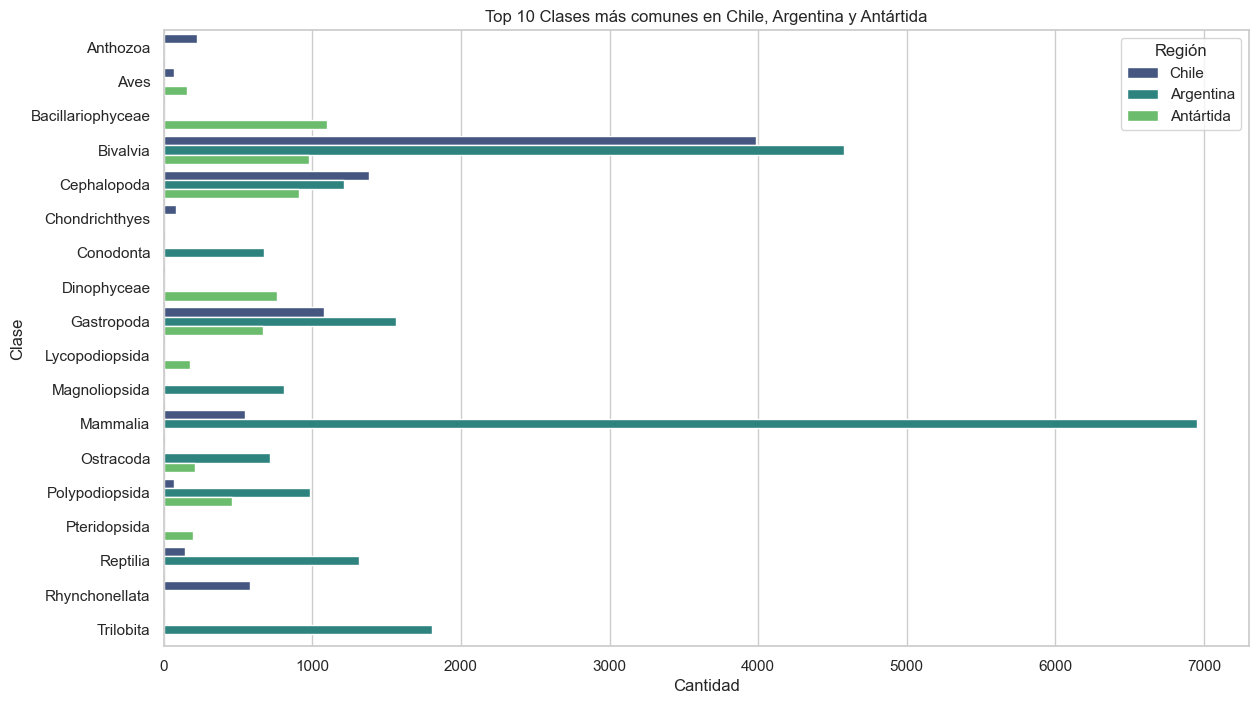

In [176]:
top_10_especies_chile_class = chile_df_class['class'].value_counts().head(10)
top_10_especies_argentina_class = argentina_df_class['class'].value_counts().head(10)
top_10_especies_antartica_class = antartica_df_class['class'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_class,
    'Argentina': top_10_especies_argentina_class,
    'Antártida': top_10_especies_antartica_class
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='class', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='class', hue='Región', palette='viridis')
plt.title('Top 10 Clases más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Clase')
plt.legend(title='Región')
plt.show()




### Observaciones

1. **Clases compartidas entre regiones**:
   - *Bivalvia* (moluscos bivalvos, como almejas y ostras): Presente en las tres regiones, destaca como la clase más abundante, reflejando la importancia de ambientes marinos en cada una.
   - *Gastropoda* (moluscos gasterópodos, como caracoles): Compartida entre todas las regiones, muestra una amplia distribución en ambientes marinos y terrestres.
   - *Cephalopoda* (moluscos cefalópodos, como calamares y nautilos): Representada en las tres regiones, subraya la conectividad de los ecosistemas marinos entre Chile, Argentina y Antártida.
   - *Polypodiopsida* (helechos): Presente en las tres regiones, evidencia ambientes húmedos o terrestres que favorecen la flora vascular.

2. **Clases dominantes por región**:
   - **Chile**:
     - *Bivalvia*, *Cephalopoda* y *Rhynchonellata* (braquiópodos marinos) son las clases más representativas, reflejando una biodiversidad marina bien establecida.
     - *Dinophyceae* (dinoflagelados, protistas): Sugiere la presencia de microfósiles marinos.
   - **Argentina**:
     - *Mammalia* (mamíferos): Es la clase más abundante, destacando ecosistemas terrestres con una alta diversidad de mamíferos fósiles.
     - *Magnoliopsida* (plantas con flores): Refleja ambientes terrestres dominados por flora vascular.
     - *Cephalopoda*: Representa una biodiversidad marina significativa.
   - **Antártida**:
     - *Bivalvia*, *Cephalopoda* y *Bacillariophyceae* (diatomeas): Destacan por su conexión con ecosistemas marinos polares.
     - *Ostracoda* (ostrácodos, pequeños crustáceos): Representa ambientes acuáticos polares.

3. **Patrones generales**:
   - Chile y Antártida están marcadas por una biodiversidad fósil mayormente marina, mientras que Argentina combina ecosistemas marinos y terrestres, siendo dominante en clases terrestres como *Mammalia*.
   - La presencia de *Gastropoda*, *Bivalvia*, *Cephalopoda* y *Polypodiopsida* en todas las regiones refleja una conectividad evolutiva y ecológica significativa entre los ecosistemas.


### **Filo (`phylum`)**

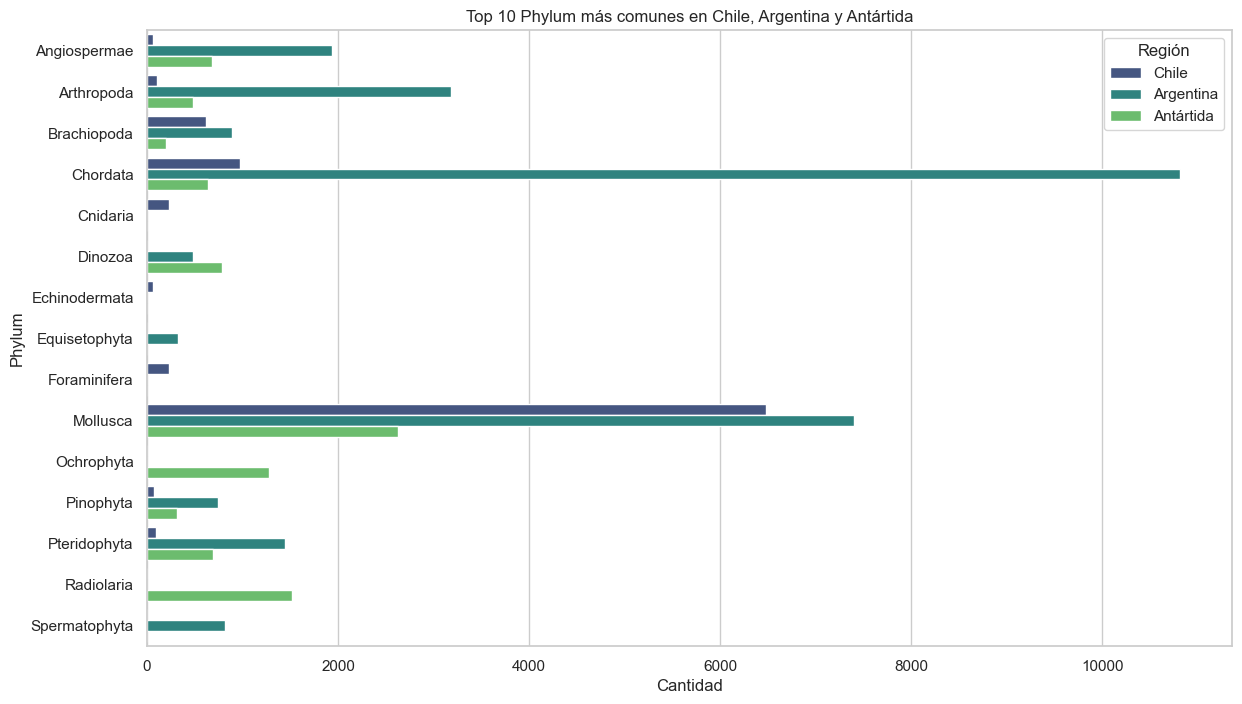

In [177]:
#Hagamos lo mismo para phylum

chile_df_phylum = chile_df[chile_df['phylum'] != 'NO_PHYLUM_SPECIFIED']
argentina_df_phylum = argentina_df[argentina_df['phylum'] != 'NO_PHYLUM_SPECIFIED']
antartica_df_phylum = antartica_df[antartica_df['phylum'] != 'NO_PHYLUM_SPECIFIED']

# Obtener los top 10 phylum más comunes en cada región
top_10_especies_chile_phylum = chile_df_phylum['phylum'].value_counts().head(10)
top_10_especies_argentina_phylum = argentina_df_phylum['phylum'].value_counts().head(10)
top_10_especies_antartica_phylum = antartica_df_phylum['phylum'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_phylum,
    'Argentina': top_10_especies_argentina_phylum,
    'Antártida': top_10_especies_antartica_phylum
}).fillna(0)

# Graficar los datos combinados con Seaborn
combined_df_reset = combined_df.reset_index().melt(id_vars='phylum', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='phylum', hue='Región', palette='viridis')
plt.title('Top 10 Phylum más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Phylum')
plt.legend(title='Región')
plt.show()



### Observaciones

1. **Phylum compartidos entre regiones**:
   - **Mollusca** (moluscos): Es el phylum más representativo en todas las regiones, con una clara dominancia tanto en ambientes marinos como terrestres.
   - **Chordata** (cordados, incluyendo vertebrados): Amplia representación en Argentina y Antártida, reflejando la biodiversidad de organismos vertebrados fósiles.
   - **Arthropoda** (artrópodos): Presente en todas las regiones, asociándose a ecosistemas marinos y terrestres.

2. **Phylum específicos por región**:
   - **Chile**:
     - Alta representación de **Brachiopoda** (braquiópodos), indicando una biodiversidad marina especializada.
     - **Foraminifera** (protistas marinos): Reflejan una rica biodiversidad en ambientes acuáticos.
   - **Argentina**:
     - Dominancia de **Chordata**, con una alta diversidad de vertebrados fósiles, particularmente mamíferos.
     - **Pinophyta** y **Pteridophyta** (plantas vasculares): Sugieren ecosistemas terrestres dominados por flora.
   - **Antártida**:
     - Representación significativa de **Radiolaria** (protistas marinos), indicando ambientes acuáticos profundos y polares.
     - **Ochrophyta** (algas marrones): Asociadas a ambientes marinos polares.

3. **Patrones generales**:
   - **Mollusca** y **Chordata** sobresalen como los phylum más diversos y dominantes, reflejando una conectividad evolutiva entre las regiones.
   - Chile y Antártida tienen una biodiversidad fósil dominada por phylum marinos, mientras que Argentina combina ecosistemas terrestres y acuáticos.


### **Distribución por era (`era_early`)**

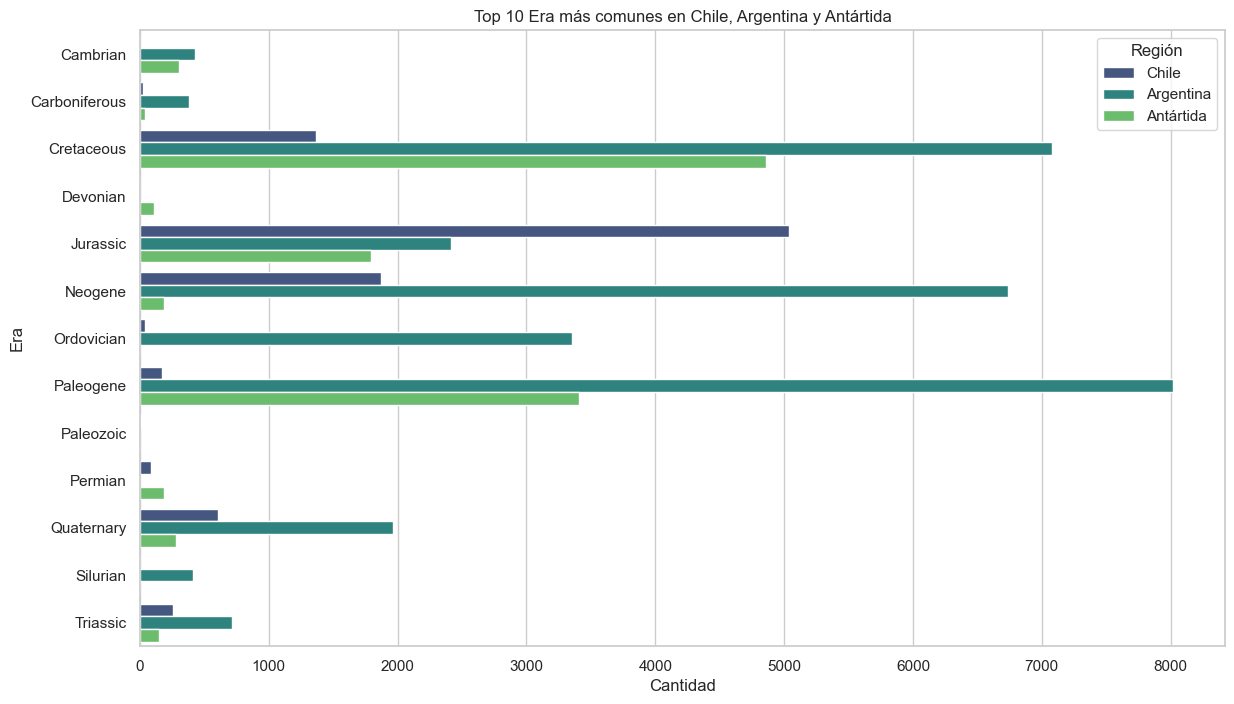

In [178]:
#Ahora hagaos lo mismo pero con era_early

# Obtener los top 10 era_early más comunes en cada región
top_10_especies_chile_era_early = chile_df['era_early'].value_counts().head(10)
top_10_especies_argentina_era_early = argentina_df['era_early'].value_counts().head(10)
top_10_especies_antartica_era_early = antartica_df['era_early'].value_counts().head(10)

# Crear un DataFrame combinado para las tres regiones
combined_df = pd.DataFrame({
    'Chile': top_10_especies_chile_era_early,
    'Argentina': top_10_especies_argentina_era_early,
    'Antártida': top_10_especies_antartica_era_early
}).fillna(0)

# Graficar los datos combinados con Seaborn

combined_df_reset = combined_df.reset_index().melt(id_vars='era_early', var_name='Región', value_name='Cantidad')
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df_reset, x='Cantidad', y='era_early', hue='Región', palette='viridis')
plt.title('Top 10 Era más comunes en Chile, Argentina y Antártida')
plt.xlabel('Cantidad')
plt.ylabel('Era')
plt.legend(title='Región')
plt.show()


### Observaciones

1. **Dominancia de ciertas eras**:
   - **Cretaceous**: Esta era es la más representativa en las tres regiones, indicando un período de gran actividad biológica y condiciones favorables para la fosilización. Esto sugiere ecosistemas ricos y diversos en todas las regiones durante este período.
   - **Paleogene**: Es especialmente prominente en Argentina y Antártida, reflejando un período clave para la diversificación de fauna terrestre y marina.
   - **Jurassic**: Chile y Argentina muestran una mayor representación en esta era, destacando la relevancia de ecosistemas marinos y continentales durante este tiempo.

2. **Diferencias entre regiones**:
   - **Chile**: Tiene una representación balanceada de eras geológicas, con un enfoque en el **Jurassic** y el **Cretaceous**, lo que apunta a una rica biodiversidad marina durante estos períodos.
   - **Argentina**: Destaca particularmente en el **Paleogene** y el **Cretaceous**, reflejando un fuerte componente terrestre en su registro fósil.
   - **Antártida**: Aunque comparte eras importantes como el **Cretaceous** y el **Paleogene**, también muestra una representación destacada del **Ordovician**, lo que sugiere una historia geológica única.

3. **Especificidad regional**:
   - El **Cambrian** tiene una representación exclusiva en Antártida, indicando una conexión con eventos geológicos antiguos únicos en esta región.
   - El **Neogene** es particularmente relevante en Chile y Argentina, relacionado con la diversificación de ecosistemas más modernos.

4. **Patrones generales**:
   - Las eras más recientes, como el **Quaternary**, están mejor representadas en Argentina y Chile, indicando una mayor conservación de fósiles recientes.
   - Las diferencias en la representación de eras entre las regiones reflejan sus historias geológicas y ecológicas únicas, con Antártida destacándose por su conexión con períodos más antiguos y Argentina por su registro fósil terrestre más reciente.


# ¿Qué diferencias y similitudes existen en la biodiversidad fósil entre estas regiones a lo largo de diferentes eras geológicas?


### Enfoque y Objetivo

En este análisis, buscamos explorar la biodiversidad fósil en Chile, Argentina y Antártida utilizando índices de biodiversidad a lo largo de diferentes eras geológicas. 
El objetivo es comparar la diversidad a seis niveles taxonómicos:
1. **Especies**
2. **Géneros**
3. **Familias**
4. **Órdenes**
5. **Clases**
6. **Filos**


Este enfoque nos permitirá:
- Identificar cómo cambian los patrones de diversidad entre niveles taxonómicos.
- Detectar eras con alta o baja biodiversidad en términos de riqueza y equitatividad.
- Explorar si los patrones observados a nivel de especies se mantienen en niveles taxonómicos más amplios.

Utilizaremos **índices de biodiversidad** como:

### **Índice de Shannon**
$$ H' = -\sum_{i=1}^S p_i \ln(p_i) $$

- $H'$: Índice de Shannon (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.

---

- Mide la diversidad combinando **riqueza** (cantidad de grupos) y **equitatividad** (distribución de los individuos entre los grupos).
- Valores más altos indican mayor diversidad y equitatividad.

| **Índice de Shannon** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | No hay diversidad (solo hay un grupo, por ejemplo, una sola especie).           |
| **1-2**               | Baja diversidad, dominada por unas pocas especies (grupos).                     |
| **3-4**               | Diversidad moderada; hay más grupos y una mejor distribución entre ellos.        |
| **5 o más**           | Alta diversidad; hay una gran cantidad de grupos y están distribuidos uniformemente. |

---

### **Índice de Simpson**

$$ D = 1 - \sum_{i=1}^S p_i^2 $$

- $D$: Índice de Simpson (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.
---
- Mide la **probabilidad de que dos individuos seleccionados al azar pertenezcan al mismo grupo**.
- A diferencia de Shannon, es más sensible a la **dominancia** de unos pocos grupos. Valores altos reflejan **menos dominancia** y mayor equitatividad.

| **Índice de Simpson** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | Total dominancia; todos los individuos pertenecen a un solo grupo.              |
| **0.1-0.4**           | Baja equitatividad; dominancia de unos pocos grupos.                            |
| **0.5-0.7**           | Moderada equitatividad; cierta dominancia, pero con más grupos presentes.        |
| **0.8 o más**         | Alta equitatividad; las especies (grupos) están distribuidas uniformemente.      |

---

### Estructura del Análisis

1. **Calcular índices de biodiversidad**:
   Aplicaremos los índices a las eras con mayor riqueza para **especies**, **géneros**, **familias**, **órdenes**, **clases** y **filos**. Esto nos permitirá observar patrones en todos los niveles taxonómicos y cómo estos cambian a lo largo del tiempo.

2. **Visualizar resultados**:
   Compararemos los índices entre niveles taxonómicos y eras.
3. **Interpretar patrones**:
   Discutiremos cómo los patrones de biodiversidad varían a lo largo del tiempo y entre niveles taxonómicos.

---


## Chile 



In [179]:
#En primer lugar para el analisis taxonomico dropearemos aquellas filas que tengan valores nulos en la columna accepted_name, genus, family, order, class, phylum
chile_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [180]:
# Seleccionar las top 5 eras con más especies únicas
top5_chile_especies = chile_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Chile:")
print(top5_chile_especies)


Top 5 eras por especies únicas en Chile:
era_early
Neogene       645
Jurassic      598
Cretaceous    443
Quaternary    210
Triassic      151
Name: accepted_name, dtype: int64


### Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile a cada nivel taxonómico (especies, géneros y familias).


In [181]:
from scipy.stats import entropy

# Función para calcular índices de biodiversidad
def calcular_indices(df, eras, nivel_taxonomico):
    indices = {}
    for era in eras.index:
        subset = df[df['era_early'] == era]
        taxon_counts = subset[nivel_taxonomico].value_counts()
        total_counts = taxon_counts.sum()
        proportions = taxon_counts / total_counts
        shannon_index = entropy(proportions, base=2)  # Shannon 
        simpson_index = 1 - sum(proportions**2)      # Simpson
        indices[era] = {'Shannon': shannon_index, 'Simpson': simpson_index}
    return indices



In [182]:
chile_df_p2_generos = chile_df.drop(chile_df[chile_df['genus'] == 'NO_GENUS_SPECIFIED'].index)
chile_df_p2_familias = chile_df.drop(chile_df[chile_df['family'] == 'NO_FAMILY_SPECIFIED'].index)
chile_df_p2_ordenes = chile_df.drop(chile_df[chile_df['order'] == 'NO_ORDER_SPECIFIED'].index)  
chile_df_p2_clases = chile_df.drop(chile_df[chile_df['class'] == 'NO_CLASS_SPECIFIED'].index)   
chile_df_p2_phylum = chile_df.drop(chile_df[chile_df['phylum'] == 'NO_PHYLUM_SPECIFIED'].index)


In [183]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_chile_especies = calcular_indices(chile_df, top5_chile_especies, 'accepted_name')
indices_chile_generos = calcular_indices(chile_df_p2_generos, top5_chile_especies, 'genus')  
indices_chile_familias = calcular_indices(chile_df_p2_familias, top5_chile_especies, 'family')  
indices_chile_ordenes = calcular_indices(chile_df_p2_ordenes, top5_chile_especies, 'order')
indices_chile_clases = calcular_indices(chile_df_p2_clases, top5_chile_especies, 'class')
indices_chile_phylum = calcular_indices(chile_df_p2_phylum, top5_chile_especies, 'phylum')


# Mostrar resultados
print("\nÍndices por especies en Chile:")
print(pd.DataFrame(indices_chile_especies).T)

print("\nÍndices por géneros en Chile:")
print(pd.DataFrame(indices_chile_generos).T)

print("\nÍndices por familias en Chile:")
print(pd.DataFrame(indices_chile_familias).T)

print("\nÍndices por ordenes en Chile:")
print(pd.DataFrame(indices_chile_ordenes).T)

print("\nÍndices por clases en Chile:")
print(pd.DataFrame(indices_chile_clases).T)

print("\nÍndices por phylum en Chile:")
print(pd.DataFrame(indices_chile_phylum).T)




Índices por especies en Chile:
             Shannon   Simpson
Neogene     8.627208  0.995495
Jurassic    7.732674  0.990075
Cretaceous  8.159620  0.994163
Quaternary  7.032858  0.988201
Triassic    6.898211  0.988160

Índices por géneros en Chile:
             Shannon   Simpson
Neogene     7.963480  0.993124
Jurassic    7.055302  0.984711
Cretaceous  7.688936  0.991922
Quaternary  6.663366  0.985421
Triassic    6.288502  0.979896

Índices por familias en Chile:
             Shannon   Simpson
Neogene     6.805490  0.984770
Jurassic    5.833524  0.970931
Cretaceous  6.366124  0.979647
Quaternary  5.728536  0.970187
Triassic    5.666709  0.969217

Índices por ordenes en Chile:
             Shannon   Simpson
Neogene     4.938961  0.932146
Jurassic    3.709118  0.876582
Cretaceous  4.454115  0.887394
Quaternary  4.433645  0.925011
Triassic    4.538763  0.942200

Índices por clases en Chile:
             Shannon   Simpson
Neogene     2.579828  0.740347
Jurassic    1.790354  0.586619
Cretace

## Visualización de Índices de Biodiversidad en Chile

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile, comparando los diferentes niveles taxonómicos.


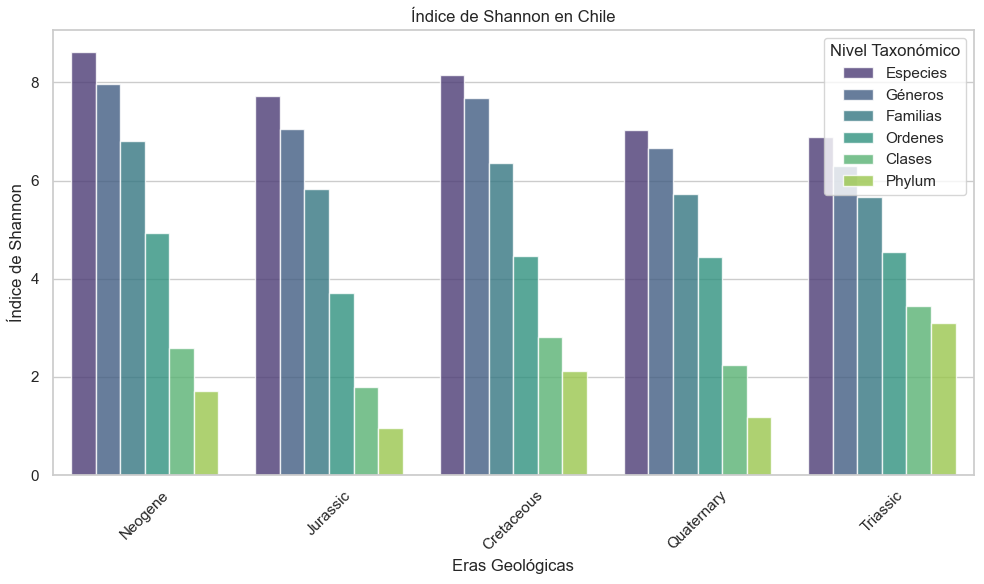

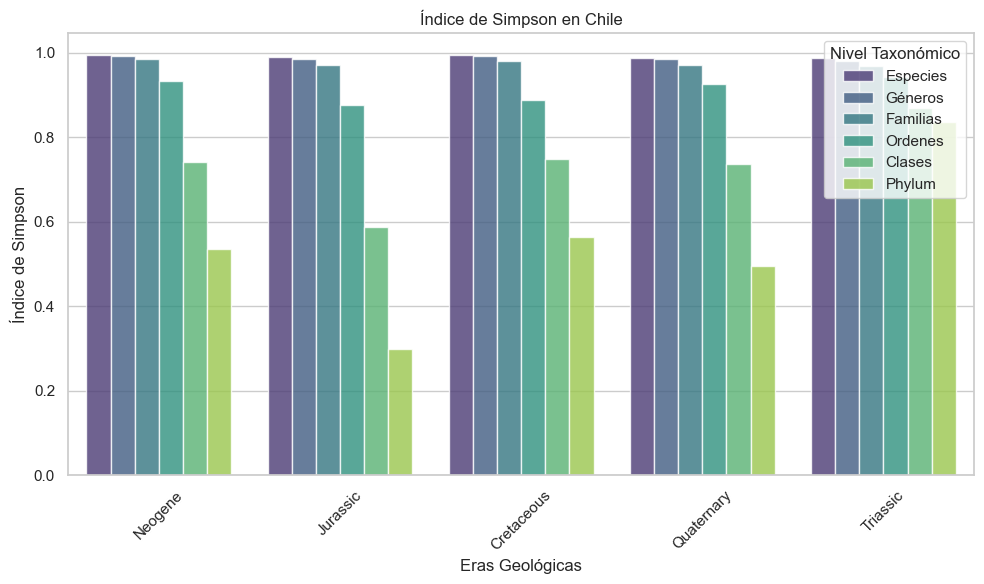

In [184]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_chile_especies).T
df_generos = pd.DataFrame(indices_chile_generos).T
df_familias = pd.DataFrame(indices_chile_familias).T
df_ordenes = pd.DataFrame(indices_chile_ordenes).T
df_clases = pd.DataFrame(indices_chile_clases).T
df_phylum = pd.DataFrame(indices_chile_phylum).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

# Combinar todos los niveles taxonómicos
df_total_chile = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_chile.reset_index(inplace=True)
df_total_chile.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### **Observaciones**

1. **Neogene como la era de mayor diversidad**:
   - El **Neogene** destaca como la era con los índices de Shannon más altos en todos los niveles taxonómicos, desde especies hasta filos. 
   - Esto sugiere una biodiversidad excepcionalmente rica y bien distribuida durante este período, reflejando condiciones ambientales favorables o eventos evolutivos significativos.

2. **Cretaceous con una alta diversidad**:
   - El **Cretaceous** muestra valores altos en los índices de Shannon para géneros y familias, aunque en niveles superiores, como órdenes y clases, se observa una ligera disminución en la diversidad.
   - Los índices de Simpson para esta era indican una buena equitatividad, lo que implica una distribución equilibrada entre los grupos presentes.

3. **Triassic como la era de menor diversidad**:
   - En todos los niveles taxonómicos, el **Triassic** presenta los índices de Shannon más bajos. Esto indica una riqueza limitada en comparación con otras eras.
   - Los índices de Simpson también muestran una menor equitatividad relativa, lo que sugiere una dominancia de unos pocos grupos durante esta era.

4. **Relación entre niveles taxonómicos**:
   - A medida que se asciende en la jerarquía taxonómica, desde especies hasta filos, los índices de Shannon disminuyen de manera consistente. Esto refleja que, aunque hay muchas especies presentes, el número de grupos en niveles superiores es más reducido.
   - Por otro lado, los índices de Simpson permanecen altos en todos los niveles, lo que indica una distribución uniforme entre los grupos dentro de cada nivel taxonómico.

5. **Balance en la biodiversidad**:
   - Los índices de Simpson cercanos a 1 en todas las eras muestran que, independientemente de la riqueza, la biodiversidad está bien distribuida dentro de cada nivel taxonómico. Esto sugiere ecosistemas balanceados con poca dominancia de grupos particulares.

### **Conclusión**:
El análisis de los niveles taxonómicos desde especies hasta filos resalta al **Neogene** como la era con la biodiversidad más rica y balanceada en Chile. Aunque otras eras como el **Cretaceous** muestran una diversidad significativa, el **Triassic** evidencia una biodiversidad más limitada. Este análisis proporciona una visión integral de cómo la biodiversidad fósil varía a través del tiempo y entre niveles taxonómicos.


## Argentina


In [185]:
argentina_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [186]:
# Seleccionar las top 5 eras con más especies únicas
top5_argentina_especies = argentina_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Argentina:")
print(top5_argentina_especies)


Top 5 eras por especies únicas en Argentina:
era_early
Paleogene     1904
Cretaceous    1843
Neogene       1815
Ordovician     914
Jurassic       682
Name: accepted_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina a cada nivel taxonómico (especies, géneros y familias).


In [187]:
argentina_df_p2_genero = argentina_df.drop(argentina_df[argentina_df['genus'] == 'NO_GENUS_SPECIFIED'].index)
argentina_df_p2_familias = argentina_df.drop(argentina_df[argentina_df['family'] == 'NO_FAMILY_SPECIFIED'].index)
argentina_df_p2_ordenes = argentina_df.drop(argentina_df[argentina_df['order'] == 'NO_ORDER_SPECIFIED'].index)
argentina_df_p2_clases = argentina_df.drop(argentina_df[argentina_df['class'] == 'NO_CLASS_SPECIFIED'].index)
argentina_df_p2_phylum = argentina_df.drop(argentina_df[argentina_df['phylum'] == 'NO_PHYLUM_SPECIFIED'].index)


In [188]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_argentina_especies = calcular_indices(argentina_df, top5_argentina_especies, 'accepted_name')
indices_argentina_generos = calcular_indices(argentina_df_p2_genero, top5_argentina_especies, 'genus')
indices_argentina_familias = calcular_indices(argentina_df_p2_familias, top5_argentina_especies, 'family')  
indices_argentina_ordenes = calcular_indices(argentina_df_p2_ordenes, top5_argentina_especies, 'order')
indices_argentina_clases = calcular_indices(argentina_df_p2_clases, top5_argentina_especies, 'class')
indices_argentina_phylum = calcular_indices(argentina_df_p2_phylum, top5_argentina_especies, 'phylum')

# Mostrar resultados
print("\nÍndices por especies en argentina:")
print(pd.DataFrame(indices_argentina_especies).T)

print("\nÍndices por géneros en argentina:")
print(pd.DataFrame(indices_argentina_generos).T)

print("\nÍndices por familias en argentina:")
print(pd.DataFrame(indices_argentina_familias).T)

print("\nÍndices por ordenes en argentina:")
print(pd.DataFrame(indices_argentina_ordenes).T)

print("\nÍndices por clases en argentina:")
print(pd.DataFrame(indices_argentina_clases).T)

print("\nÍndices por phylum en argentina:")
print(pd.DataFrame(indices_argentina_phylum).T)



Índices por especies en argentina:
              Shannon   Simpson
Paleogene    9.960087  0.998153
Cretaceous   9.971598  0.998042
Neogene     10.022243  0.998383
Ordovician   8.958215  0.996215
Jurassic     8.578481  0.995255

Índices por géneros en argentina:
             Shannon   Simpson
Paleogene   9.091181  0.996431
Cretaceous  9.090625  0.996487
Neogene     8.914170  0.996100
Ordovician  7.953243  0.990930
Jurassic    7.963408  0.993094

Índices por familias en argentina:
             Shannon   Simpson
Paleogene   7.215504  0.986745
Cretaceous  7.134241  0.987567
Neogene     6.680568  0.982380
Ordovician  5.921207  0.951311
Jurassic    6.242092  0.978097

Índices por ordenes en argentina:
             Shannon   Simpson
Paleogene   5.582721  0.956545
Cretaceous  5.531884  0.962231
Neogene     4.541274  0.898159
Ordovician  4.375513  0.914334
Jurassic    3.639628  0.825434

Índices por clases en argentina:
             Shannon   Simpson
Paleogene   3.574494  0.856349
Cretaceous  

## Visualización de Índices de Biodiversidad en Argentina

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina, comparando los diferentes niveles taxonómicos.


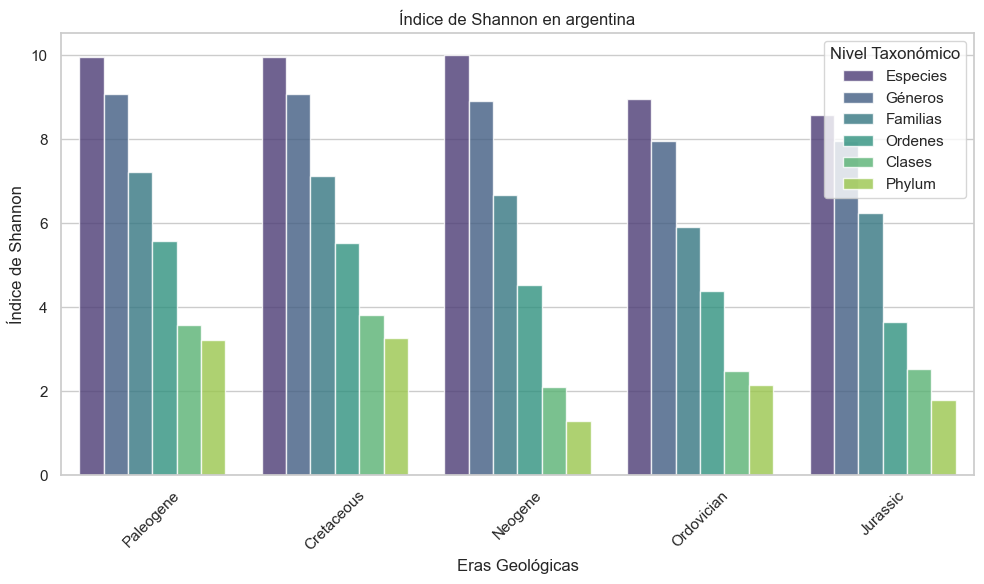

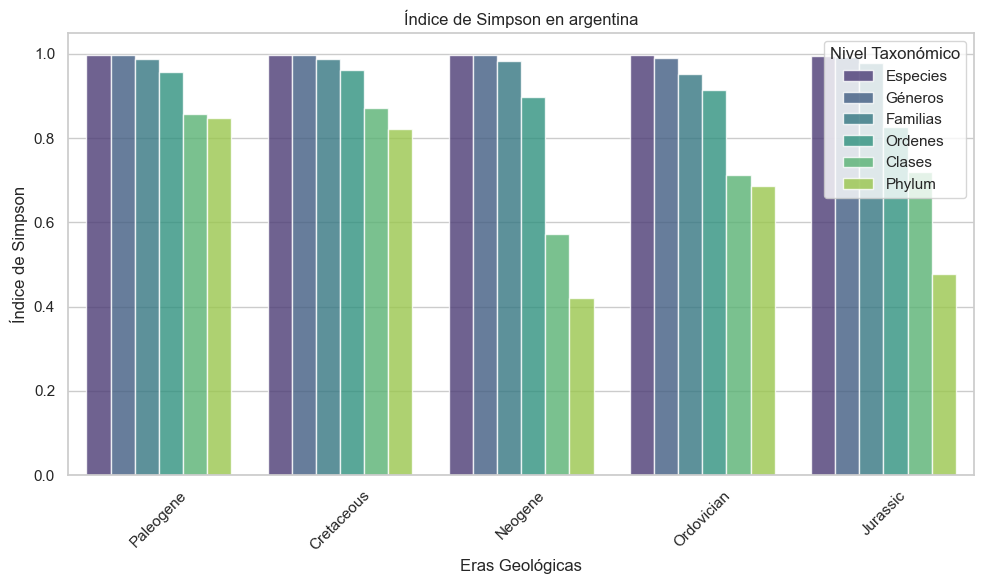

In [189]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_argentina_especies).T
df_generos = pd.DataFrame(indices_argentina_generos).T
df_familias = pd.DataFrame(indices_argentina_familias).T
df_ordenes = pd.DataFrame(indices_argentina_ordenes).T
df_clases = pd.DataFrame(indices_argentina_clases).T
df_phylum = pd.DataFrame(indices_argentina_phylum).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

# Combinar todos los niveles taxonómicos
df_total_argentina = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_argentina.reset_index(inplace=True)
df_total_argentina.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Shannon', hue='Nivel', palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### **Observaciones**

1. **Paleogene como la era más diversa**:
   - El **Paleogene** sobresale con los índices de Shannon más altos en todos los niveles taxonómicos, desde especies hasta filos.
   - Este patrón sugiere un período con una gran diversidad taxonómica y una distribución balanceada entre los grupos presentes.

2. **Cretaceous y Neogene con alta diversidad**:
   - Tanto el **Cretaceous** como el **Neogene** muestran valores altos de Shannon, particularmente en los niveles de especies, géneros y familias.
   - Sin embargo, la diversidad tiende a disminuir levemente en niveles más generales como órdenes y clases.

3. **Ordovician con menor diversidad**:
   - El **Ordovician** presenta índices de Shannon más bajos que las demás eras, especialmente en los niveles de especies y géneros. Esto indica una menor riqueza taxonómica durante este período.

4. **Tendencias entre niveles taxonómicos**:
   - Los índices de Shannon disminuyen gradualmente a medida que se asciende en la jerarquía taxonómica, reflejando una reducción en la riqueza de grupos más amplios como órdenes, clases y filos.
   - Sin embargo, los índices de Simpson permanecen altos, lo que sugiere una distribución equitativa entre los grupos dentro de cada nivel taxonómico.

5. **Distribución equitativa (Simpson)**:
   - Todas las eras muestran índices de Simpson cercanos a 1, indicando ecosistemas balanceados y una distribución uniforme entre los grupos.

### **Conclusión**:
El análisis de múltiples niveles taxonómicos revela que el **Paleogene** es la era más diversa en Argentina, seguido de cerca por el **Cretaceous** y el **Neogene**. A pesar de estas diferencias en riqueza, los índices de Simpson altos en todas las eras reflejan una distribución equilibrada en los grupos presentes, destacando la estabilidad ecológica de los ecosistemas fósiles en estas eras.


## Antartica

In [190]:
antartica_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

In [191]:
# Seleccionar las top 5 eras con más especies únicas
top5_antartica_especies = antartica_df.groupby('era_early')['accepted_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Antartica:")
print(top5_antartica_especies)


Top 5 eras por especies únicas en Antartica:
era_early
Cretaceous    1082
Paleogene      682
Jurassic       398
Cambrian       197
Neogene        110
Name: accepted_name, dtype: int64


In [192]:
antartica_df.dropna(subset=['accepted_name', 'genus', 'family', "order", "class", "phylum"], inplace=True)

## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica a cada nivel taxonómico (especies, géneros y familias).


In [193]:
antartica_df_p2_genus = antartica_df[antartica_df.family != 'NO_GENUS_SPECIFIED']
antartica_df_p2_familias= antartica_df[antartica_df.family != 'NO_FAMILY_SPECIFIED']
antartica_df_p2_ordenes = antartica_df[antartica_df.order != 'NO_ORDER_SPECIFIED']
antartica_df_p2_clases = antartica_df[antartica_df['class'] != 'NO_CLASS_SPECIFIED']    
antartica_df_p2_phylum = antartica_df[antartica_df['phylum'] != 'NO_PHYLUM_SPECIFIED']


In [194]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_antartica_especies = calcular_indices(antartica_df, top5_antartica_especies, 'accepted_name')
indices_antartica_generos = calcular_indices(antartica_df_p2_genus, top5_antartica_especies, 'genus')  # Misma top 5
indices_antartica_familias = calcular_indices(antartica_df_p2_familias, top5_antartica_especies, 'family')  # Misma top 5
indices_antartica_ordenes = calcular_indices(antartica_df_p2_ordenes, top5_antartica_especies, 'order')
indices_antartica_clases = calcular_indices(antartica_df_p2_clases, top5_antartica_especies, 'class')
indices_antartica_phylum = calcular_indices(antartica_df_p2_phylum, top5_antartica_especies, 'phylum')

# Mostrar resultados
print("\nÍndices por especies en antartica:")
print(pd.DataFrame(indices_antartica_especies).T)

print("\nÍndices por géneros en antartica:")
print(pd.DataFrame(indices_antartica_generos).T)

print("\nÍndices por familias en antartica:")
print(pd.DataFrame(indices_antartica_familias).T)

print("\nÍndices por ordenes en antartica:")
print(pd.DataFrame(indices_antartica_ordenes).T)

print("\nÍndices por clases en antartica:")
print(pd.DataFrame(indices_antartica_clases).T)

print("\nÍndices por phylum en antartica:")
print(pd.DataFrame(indices_antartica_phylum).T)




Índices por especies en antartica:
             Shannon   Simpson
Cretaceous  9.017879  0.996338
Paleogene   8.359675  0.992989
Jurassic    7.980337  0.994396
Cambrian    7.421521  0.993008
Neogene     6.544330  0.986676

Índices por géneros en antartica:
             Shannon   Simpson
Cretaceous  8.212143  0.993433
Paleogene   7.835154  0.989796
Jurassic    6.404770  0.976696
Cambrian    7.168272  0.991198
Neogene     6.310020  0.982459

Índices por familias en antartica:
             Shannon   Simpson
Cretaceous  6.199853  0.973108
Paleogene   6.560792  0.978556
Jurassic    5.172061  0.943419
Cambrian    6.234134  0.981812
Neogene     5.627235  0.969219

Índices por ordenes en antartica:
             Shannon   Simpson
Cretaceous  4.731771  0.915555
Paleogene   5.367070  0.959072
Jurassic    2.364538  0.688997
Cambrian    4.318983  0.928490
Neogene     3.593081  0.856047

Índices por clases en antartica:
             Shannon   Simpson
Cretaceous  3.510670  0.869877
Paleogene   3.5500

## Visualización de Índices de Biodiversidad en Antartica

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica, comparando los diferentes niveles taxonómicos.


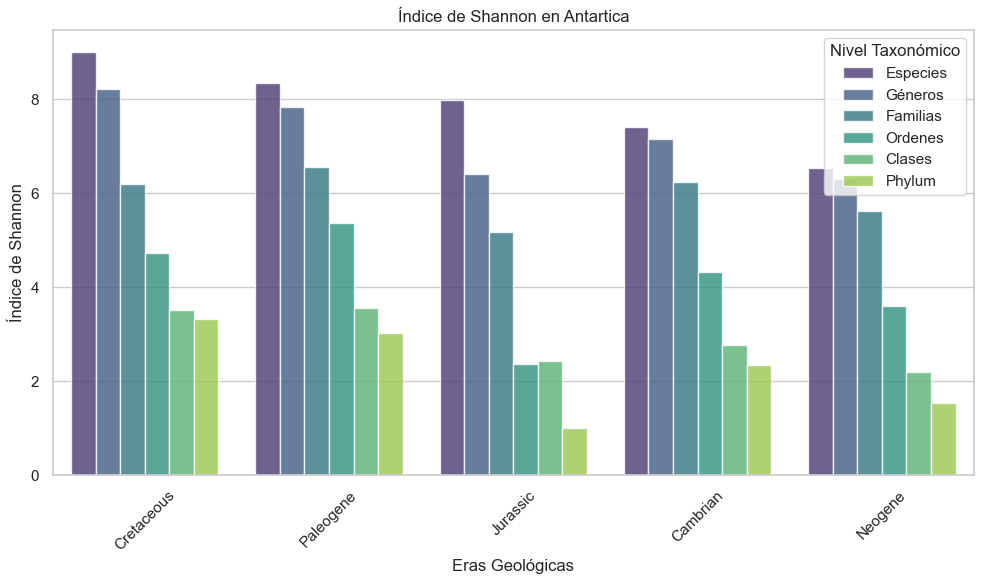

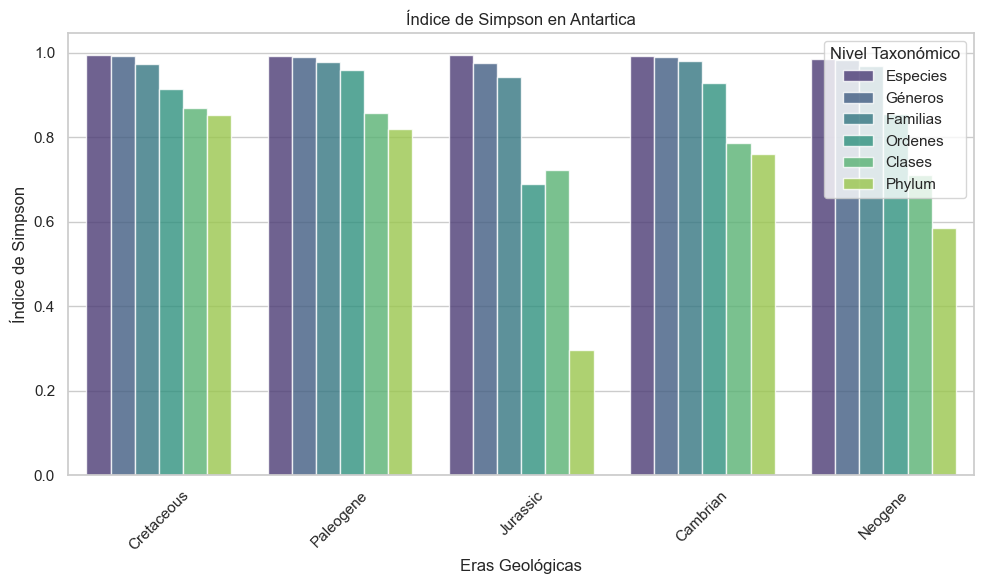

In [195]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_antartica_especies).T
df_generos = pd.DataFrame(indices_antartica_generos).T
df_familias = pd.DataFrame(indices_antartica_familias).T
df_ordenes = pd.DataFrame(indices_antartica_ordenes).T
df_clases = pd.DataFrame(indices_antartica_clases).T
df_phylum = pd.DataFrame(indices_antartica_phylum).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'
df_ordenes['Nivel'] = 'Ordenes'
df_clases['Nivel'] = 'Clases'
df_phylum['Nivel'] = 'Phylum'

# Combinar todos los niveles taxonómicos
df_total_antartica = pd.concat([df_especies, df_generos, df_familias, df_ordenes, df_clases, df_phylum])
df_total_antartica.reset_index(inplace=True)
df_total_antartica.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Análisis de la biodiversidad en la Antártida**

1. **Cretaceous como era dominante**:
   - La era **Cretaceous** muestra los valores más altos del índice de Shannon en niveles taxonómicos de **especies** y **géneros**, indicando una diversidad significativa en estos niveles.
   - En niveles más amplios, como **familias**, **órdenes**, y **clases**, la diversidad se mantiene elevada pero con una ligera disminución.

2. **Paleogene con alta equitatividad**:
   - El índice de Simpson en el **Paleogene** es consistentemente cercano a 1 para todos los niveles taxonómicos, lo que indica una distribución equilibrada entre los grupos fósiles.
   - Este patrón sugiere un ecosistema más balanceado en comparación con otras eras.

3. **Cambrian como una era taxonómicamente interesante**:
   - Aunque la diversidad en términos de **especies** es menor, el índice de Shannon muestra valores elevados para **géneros** y **familias**, lo que podría reflejar una diversidad estructural más notable en niveles amplios.

4. **Neogene con diversidad más limitada**:
   - El **Neogene** presenta valores más bajos en los índices de Shannon y Simpson, especialmente en **especies** y **géneros**, lo que sugiere una menor diversidad y equitatividad en esta era.

5. **Equitatividad general en la Antártida**:
   - En todas las eras, los índices de Simpson reflejan una equitatividad alta, lo que sugiere una distribución equilibrada de grupos fósiles entre los niveles taxonómicos.

6. **Relación entre niveles taxonómicos**:
   - Los índices muestran una caída progresiva desde **especies** hacia **phylum**, indicando una disminución en la diversidad a medida que se amplía el nivel taxonómico. Este patrón es consistente con las otras regiones estudiadas.


### **Conclusión**
La Antártida muestra patrones únicos de biodiversidad fósil, donde eras como el **Cretaceous** y el **Paleogene** destacan por su alta diversidad y equitatividad. Sin embargo, en niveles taxonómicos más amplios, como **familias**, **órdenes** y **phylum**, la diversidad disminuye, reflejando una estructura ecológica más concentrada. 

El equilibrio observado en los índices de Simpson sugiere ecosistemas relativamente estables y balanceados en comparación con otras regiones. Esto podría estar relacionado con factores ambientales específicos de la Antártida durante estas eras, como condiciones climáticas o restricciones geográficas. Por otro lado, la menor diversidad en eras como el **Neogene** apunta a posibles limitaciones evolutivas o ambientales en el desarrollo de los ecosistemas en esta región.


## **Comparación entre Chile y Argentina en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En **especies** y **géneros**, Argentina muestra consistentemente una mayor diversidad en todas las eras comunes (*Neogene*, *Jurassic*, *Cretaceous*).
   - En **familias**, Chile alcanza valores similares a los de Argentina en algunas eras (*Neogene* y *Cretaceous*), aunque Argentina mantiene una ligera ventaja.
   - En niveles más amplios, como **órdenes**, **clases** y **phylum**, Argentina también lidera en diversidad, destacando su mayor riqueza taxonómica general.

2. **Equitatividad (Índice de Simpson)**:
   - Ambos países presentan índices de Simpson elevados, reflejando distribuciones relativamente balanceadas entre los diferentes grupos taxonómicos.
   - Argentina tiene una ligera ventaja en equitatividad en los niveles de **especies** y **géneros**, lo que sugiere ecosistemas más equilibrados.
   - En niveles más amplios, como **familias**, **órdenes**, y **clases**, ambos países muestran equitatividad similar.

3. **Patrones Generales**:
   - Argentina destaca por su mayor riqueza en todos los niveles taxonómicos, lo que indica una biodiversidad fósil más amplia.
   - Chile, aunque presenta una menor riqueza en niveles más detallados, mantiene un equilibrio en sus índices de diversidad, especialmente en niveles taxonómicos superiores como **familias** y **órdenes**.
   - Las diferencias observadas pueden estar influenciadas por factores paleogeográficos y ambientales, como la diversidad de hábitats y las condiciones climáticas predominantes en ambas regiones durante las eras geológicas.


## **Comparación entre Chile y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En **especies** y **géneros**, Chile y Antártida presentan valores similares en **Jurassic** y **Cretaceous**, aunque Chile tiene una ventaja en **Quaternary**.
   - En **familias**, Chile supera ligeramente a la Antártida en todas las eras comunes (*Jurassic*, *Cretaceous*, y *Quaternary*).
   - En niveles más amplios como **órdenes**, **clases**, y **phylum**, la Antártida muestra una diversidad más consistente entre eras.

2. **Equitatividad (Índice de Simpson)**:
   - Ambos países presentan índices de Simpson elevados, reflejando distribuciones balanceadas en todos los niveles taxonómicos.
   - En **especies**, **géneros**, y **familias**, Chile tiene una leve ventaja en equitatividad durante **Jurassic** y **Cretaceous**, mientras que en **Quaternary**, ambos países muestran resultados similares.

3. **Patrones Generales**:
   - Chile tiende a tener mayor diversidad en niveles taxonómicos más amplios (*familias*, *órdenes*), mientras que la Antártida mantiene una diversidad equilibrada en todos los niveles.
   - La Antártida, al ser un ambiente más extremo y menos diverso, podría explicar los valores más bajos en niveles detallados (*especies*, *géneros*).
   - Las similitudes en equitatividad sugieren que ambas regiones compartían ecosistemas balanceados, aunque influenciados por factores geográficos y ambientales distintos.


## **Comparación entre Argentina y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En **especies** y **géneros**, Argentina muestra consistentemente mayor diversidad que la Antártida en todas las eras comunes (*Jurassic*, *Cretaceous*, y *Paleogene*).
   - En **familias**, Argentina también lidera, especialmente en **Cretaceous** y **Paleogene**, mientras que las diferencias son menores en **Jurassic**.
   - En niveles más amplios como **órdenes**, **clases**, y **phylum**, la ventaja de Argentina sigue siendo evidente, reflejando una mayor riqueza taxonómica.

2. **Equitatividad (Índice de Simpson)**:
   - Ambos países muestran índices de Simpson elevados en todos los niveles taxonómicos, lo que indica distribuciones relativamente balanceadas.
   - La Antártida tiene una equitatividad ligeramente mayor en **especies** y **géneros** durante **Cretaceous**, mientras que Argentina tiene mejores resultados en **Paleogene** y **Jurassic**.
   - En niveles amplios como **familias**, **órdenes**, y **clases**, Argentina domina en equitatividad durante todas las eras comunes.

3. **Patrones Generales**:
   - Argentina muestra una biodiversidad más rica y equilibrada en todos los niveles taxonómicos, lo que refleja un ecosistema más diverso y dinámico.
   - La Antártida, aunque con menor diversidad, mantiene una buena equitatividad, lo que sugiere ecosistemas balanceados a pesar de la menor riqueza taxonómica.
   - Las diferencias en riqueza y equitatividad entre ambas regiones podrían estar influenciadas por las condiciones climáticas y geográficas particulares de cada región durante las eras geológicas comunes.


## ¿Cómo varía la distribución de especies fósiles a lo largo del tiempo en cada región?

In [ ]:
import zipfile

# Extraemos provincia.zip y Regiones.zip que están en la carpeta data
#with zipfile.ZipFile('data/provincia.zip', 'r') as zip_ref:
    #zip_ref.extractall('data/')

#with zipfile.ZipFile('data/Regiones.zip', 'r') as zip_ref:
    #zip_ref.extractall('data/')


In [197]:
from shapely.geometry import Point

# Definir la función para asignar regiones
def asignar_regiones(df, lat_col, lng_col, shapefile_path):
    # Cargar el shapefile que contiene las regiones
    regiones = gpd.read_file(shapefile_path).to_crs(4326)

    # Convertir el DataFrame en un GeoDataFrame
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    # Realizar la unión espacial
    resultado = gpd.sjoin(geo_df, regiones, how='left', predicate='intersects')

    # Eliminar la columna 'geometry' si no la necesitas
    resultado = resultado.drop(columns='geometry')

    # Retornar el DataFrame con la nueva columna de región
    return resultado

# Obtener el directorio de trabajo actual
base_dir = os.getcwd()

# Definir la ruta relativa al shapefile
shapefile_path = os.path.join('data', 'Regional.shp')

# Asignar regiones
resultado = asignar_regiones(chile_df, 'lat', 'lng', shapefile_path)

# Actualizar la columna 'region' en chile_df
chile_df['region'] = resultado['Region']  # Asegúrate de que 'Region' es el nombre correcto

# Mostrar el DataFrame actualizado
print(chile_df[['species_name', 'lat', 'lng', 'region']])
chile_df = chile_df.drop(columns='geometry', errors='ignore')

     species_name        lat        lng  \
0       ceciliana -37.000000 -73.000000   
1      amuriensis -37.000000 -73.000000   
2     cuneiformis -37.000000 -73.000000   
3     levitestata -37.000000 -73.000000   
4         pencana -37.000000 -73.000000   
...           ...        ...        ...   
9475          sp. -50.884998 -72.625000   
9476          sp. -50.884998 -72.625000   
9477   antarctica -50.884998 -72.625000   
9478          sp. -50.884998 -72.625000   
9479   saladensis -27.684723 -70.949997   

                                        region  
0                           Región del Bío-Bío  
1                           Región del Bío-Bío  
2                           Región del Bío-Bío  
3                           Región del Bío-Bío  
4                           Región del Bío-Bío  
...                                        ...  
9475  Región de Magallanes y Antártica Chilena  
9476  Región de Magallanes y Antártica Chilena  
9477  Región de Magallanes y Antártica Chi

Ahora veremos cuantos fosiles hay en chile y como estan distribuidos por todo el pais separandolo por region.

                                       region  total_ocurrencias
0                Región de Arica y Parinacota               39.0
1                          Región de Tarapacá              101.0
2                       Región de Antofagasta              808.0
3    Región de Magallanes y Antártica Chilena              493.0
4   Región de Aysén del Gral.Ibañez del Campo              487.0
5                           Región de Atacama             4407.0
6                          Región de Coquimbo              602.0
7                        Región de Valparaíso               39.0
8            Región Metropolitana de Santiago              438.0
9                         Región de Los Lagos              171.0
10                         Región de Los Ríos               10.0
11                     Región de La Araucanía               12.0
12                         Región del Bío-Bío              240.0
13                            Región de Ñuble               31.0
14                       

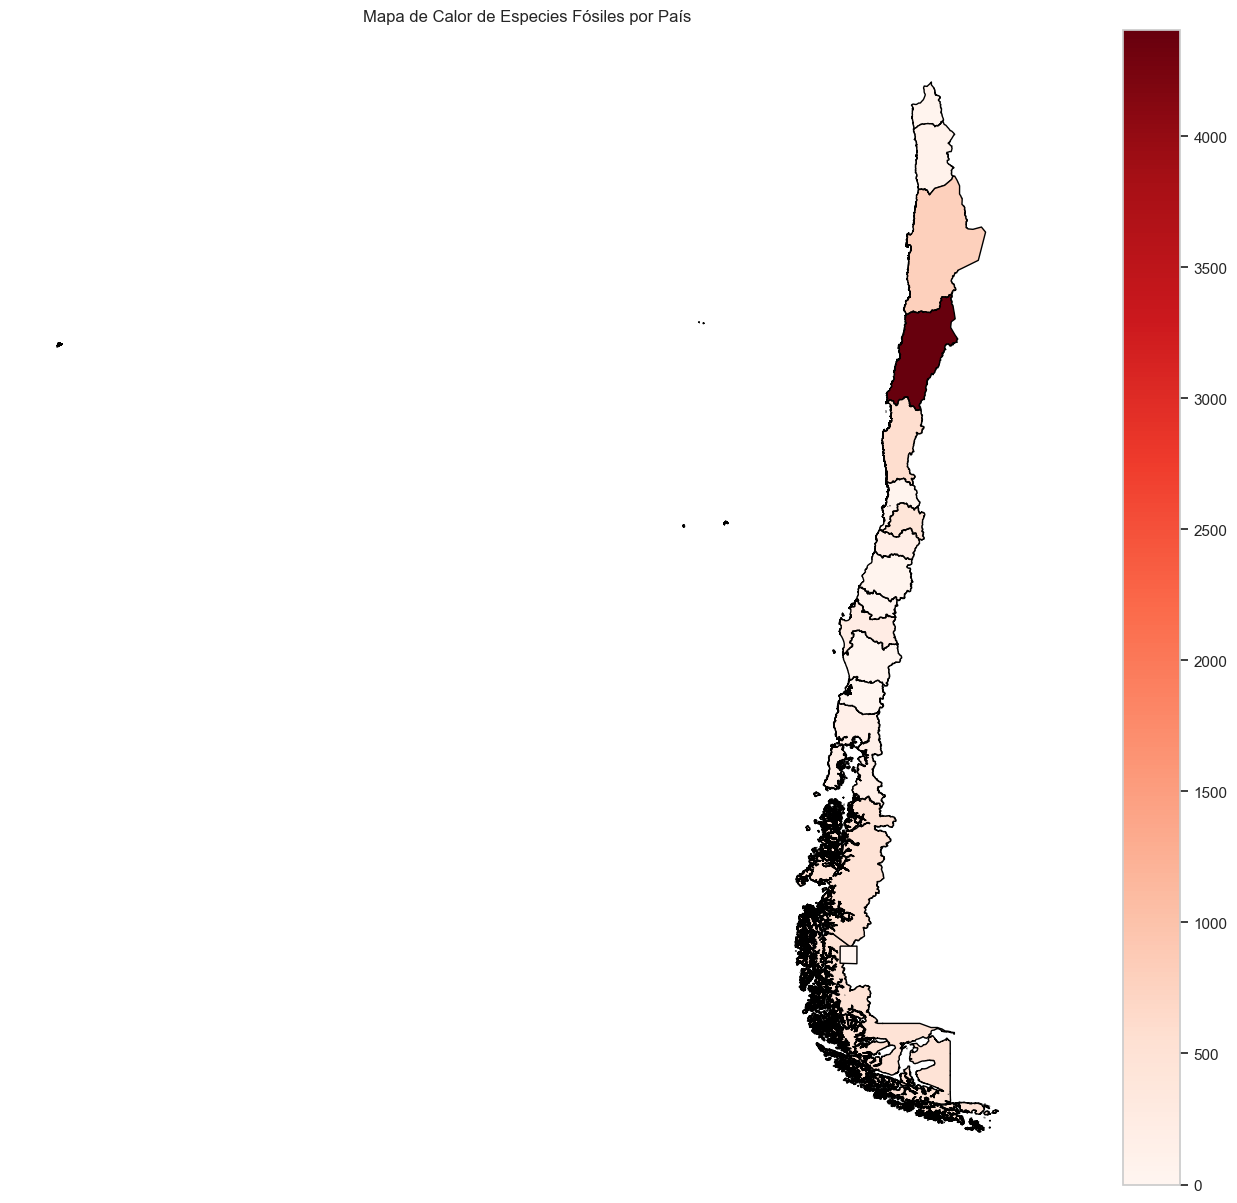

In [198]:

paises = gpd.read_file(shapefile_path).to_crs(4326)
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

paises = paises.rename(columns={'Region': 'region'})

paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

merged = paises.merge(distribucion, on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

print(merged[['region', 'total_ocurrencias']])

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles por País')
ax.set_axis_off()  

plt.show()

Se puede ver en el anterior mapa que el mapa de calor y la mayor cantidad de fosiles estan en la region de atacama. 

Como lo hicimos en Chile con las regiones lo haremos con el simil de argentina el cual son las provincias.

In [199]:
def asignar_provincias(df, lat_col, lng_col, shapefile_path):
    provincias = gpd.read_file(shapefile_path).to_crs(4326)
    print(provincias.columns)
    
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    resultados_arg = gpd.sjoin(geo_df, provincias, how='left', predicate='intersects')
    resultados_arg = resultados_arg.drop(columns='geometry')

    return resultados_arg


base_dir = os.getcwd()
shapefile_path_pro = os.path.join('data', 'provincia.shp')


resultados_arg = asignar_provincias(argentina_df, 'lat', 'lng', shapefile_path_pro)
print(resultados_arg.columns)

argentina_df['region'] = resultados_arg['nam'] 

print(argentina_df[['species_name', 'lat', 'lng', 'region']])
argentina_df = argentina_df.drop(columns='geometry', errors='ignore')

Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
Index(['species_name', 'occurrence_no', 'accepted_name', 'early_interval',
       'late_interval', 'phylum', 'class', 'order', 'family', 'genus', 'lat',
       'lng', 'diet', 'life_habit', 'environment', 'taxon_environment',
       'primary_name', 'era_early', 'era_late', 'index_right', 'gid',
       'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag'],
      dtype='object')
          species_name        lat        lng   region
0                  sp. -39.000000 -69.000000  Neuquén
1               rocana -39.000000 -69.000000  Neuquén
2           feruglioli -39.000000 -69.000000  Neuquén
3                  sp. -39.000000 -69.000000  Neuquén
4      mechanquilensis -39.000000 -69.000000  Neuquén
...                ...        ...        ...      ...
31876         cretacea -38.099998 -68.383331  Neuquén
31877     macrocephala -38.099998 -68.383331  Neuquén
31878        excellens -38.099998 -68.38

Columnas en el shapefile de provincias: Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                8.0
1                                             Neuquén             3463.0
2                                            San Luis              145.0
3                                            Santa Fe              297.0
4                                            La Rioja              619.0
5                                           Catamarca              480.0
6                                             Tucumán               87.0
7                                               Chaco               30.0
8                                             Formosa                8.0
9                                          Santa Cruz             4655.0
10                                             Chubut        

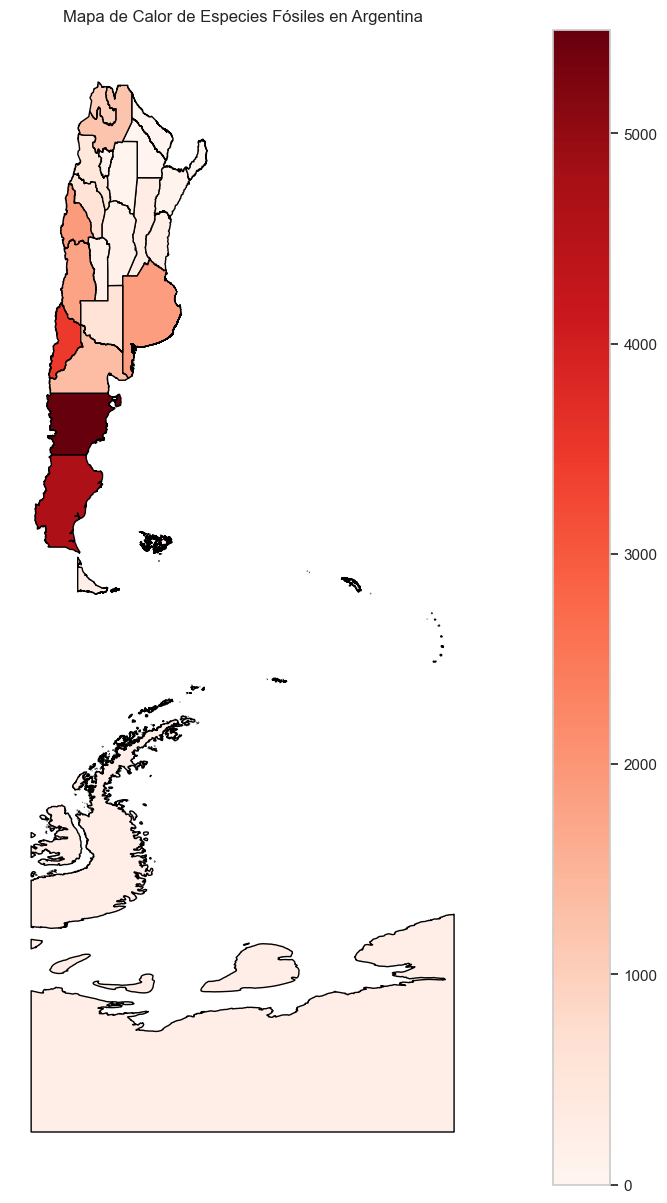

In [200]:

provincias = gpd.read_file(shapefile_path_pro).to_crs(4326)

print("Columnas en el shapefile de provincias:", provincias.columns)

df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

provincias['nam'] = provincias['nam'].astype(str)  
distribucion['region'] = distribucion['region'].astype(str)  

merged = provincias.merge(distribucion, left_on='nam', right_on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

print(merged[['nam', 'total_ocurrencias']])

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles en Argentina')
ax.set_axis_off()  

plt.show()

En el anterior mapa podemos ver que en la provincia de Chubut es en la cual esta la mayoria de los fosiles del territorio argentino.

c:\Users\octah\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\octah\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\octah\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\octah\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.

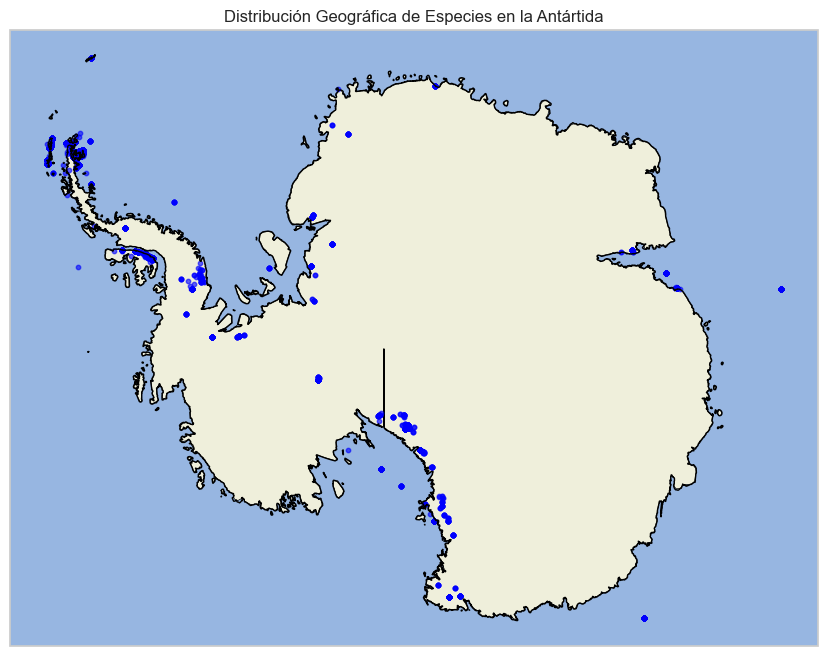

In [204]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

ax.scatter(antartica_df['lng'], antartica_df['lat'], color='blue', alpha=0.6, s=10,
           transform=ccrs.PlateCarree())

plt.title('Distribución Geográfica de Especies en la Antártida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Y en este mapa de la antartica se puede ver que justamente en la parte perteneciente a Chile y Argentina es en la cual se ubican la mayoria de hallasgos fosiles

Definiremos las top 5 eras en Chile,Argentina y la Antartica para analizar la pregunta

In [205]:
top_eras_chile = chile_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_chile.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_chile = top_eras_chile.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_chile)

     era_early  total_fossils
3     Jurassic           4789
4      Neogene           1658
1   Cretaceous           1107
9   Quaternary            518
10    Triassic            240


In [206]:
# Agrupar por era y contar la cantidad de fósiles
top_eras_argentina = argentina_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_argentina.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_argentina = top_eras_argentina.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_argentina)

    era_early  total_fossils
7   Paleogene           6776
5     Neogene           5913
2  Cretaceous           5743
6  Ordovician           3246
4    Jurassic           2060


In [207]:
top_eras_antartica = antartica_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_antartica.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_antartica = top_eras_antartica.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_antartica)

    era_early  total_fossils
2  Cretaceous           4468
7   Paleogene           3121
4    Jurassic           1754
0    Cambrian            282
9  Quaternary            204


Ahora lo que haremos es mostrar los 5 mapas de cada uno de los top en chile para ver los posibles cambios en la biodiversidad segun la era.

Datos combinados para la era Jurassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               16.0
1                          Región de Tarapacá               96.0
2                       Región de Antofagasta              606.0
3    Región de Magallanes y Antártica Chilena               14.0
4   Región de Aysén del Gral.Ibañez del Campo                5.0
5                           Región de Atacama             3400.0
6                          Región de Coquimbo              166.0
7                        Región de Valparaíso               16.0
8            Región Metropolitana de Santiago              398.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                0.0
13                            Región de Ñuble      

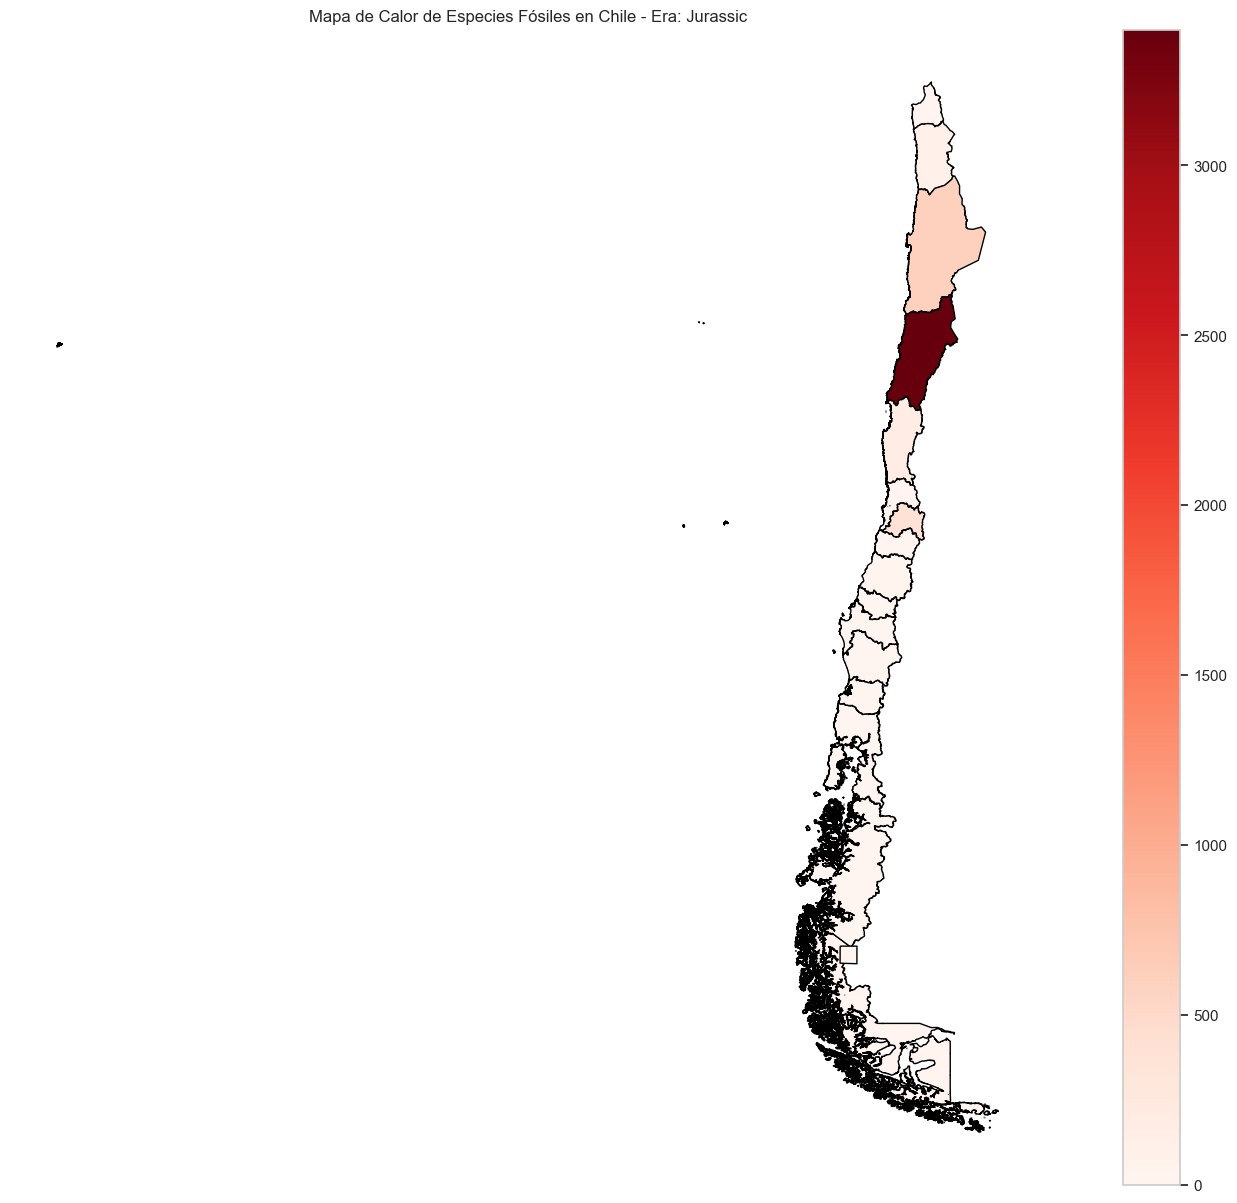

Datos combinados para la era Neogene:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               20.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               71.0
3    Región de Magallanes y Antártica Chilena               16.0
4   Región de Aysén del Gral.Ibañez del Campo              471.0
5                           Región de Atacama              288.0
6                          Región de Coquimbo              180.0
7                        Región de Valparaíso               17.0
8            Región Metropolitana de Santiago                4.0
9                         Región de Los Lagos              161.0
10                         Región de Los Ríos                2.0
11                     Región de La Araucanía                9.0
12                         Región del Bío-Bío               71.0
13                            Región de Ñuble       

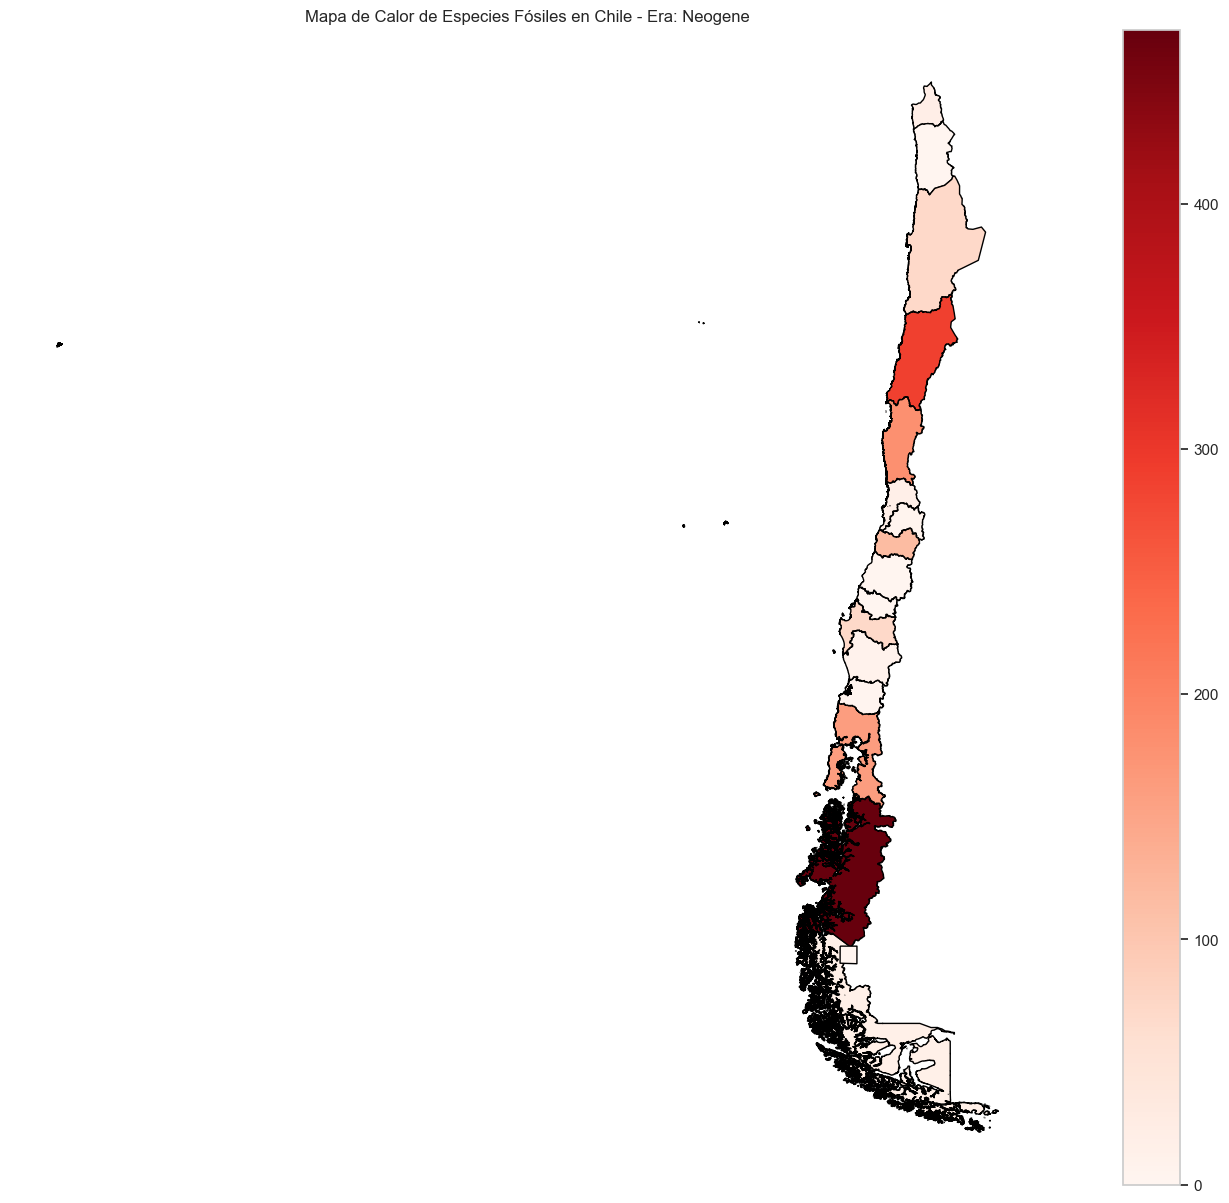

Datos combinados para la era Cretaceous:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                1.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               12.0
3    Región de Magallanes y Antártica Chilena              349.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama              323.0
6                          Región de Coquimbo              189.0
7                        Región de Valparaíso                0.0
8            Región Metropolitana de Santiago               29.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío               96.0
13                            Región de Ñuble    

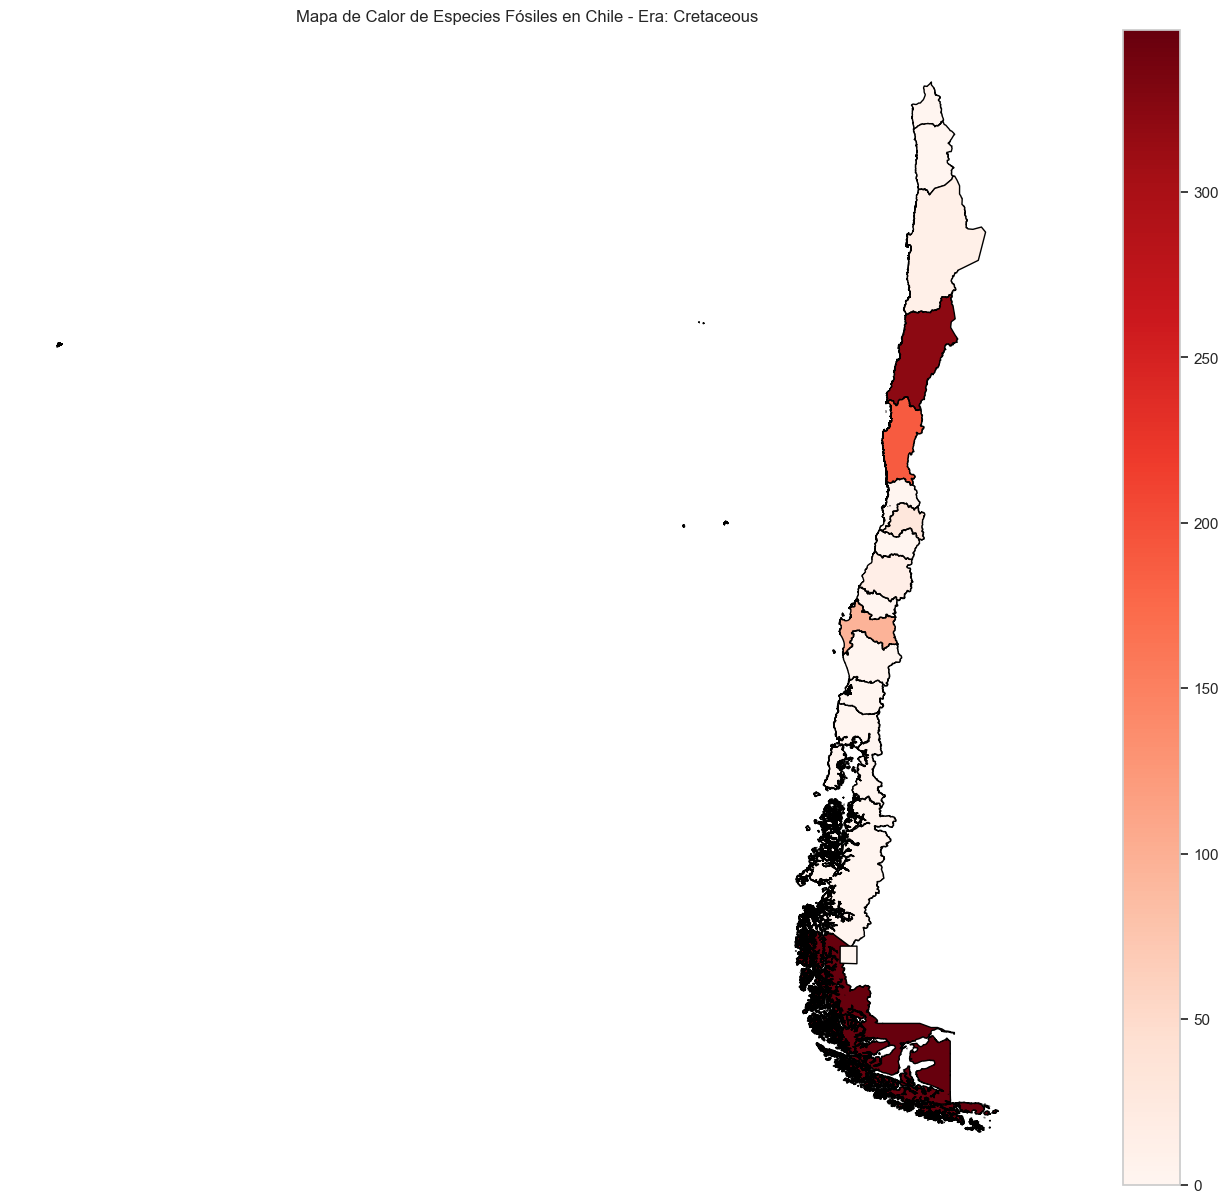

Datos combinados para la era Quaternary:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                2.0
1                          Región de Tarapacá                4.0
2                       Región de Antofagasta               10.0
3    Región de Magallanes y Antártica Chilena               53.0
4   Región de Aysén del Gral.Ibañez del Campo               10.0
5                           Región de Atacama              238.0
6                          Región de Coquimbo               47.0
7                        Región de Valparaíso                2.0
8            Región Metropolitana de Santiago                7.0
9                         Región de Los Lagos                9.0
10                         Región de Los Ríos                3.0
11                     Región de La Araucanía                3.0
12                         Región del Bío-Bío               25.0
13                            Región de Ñuble    

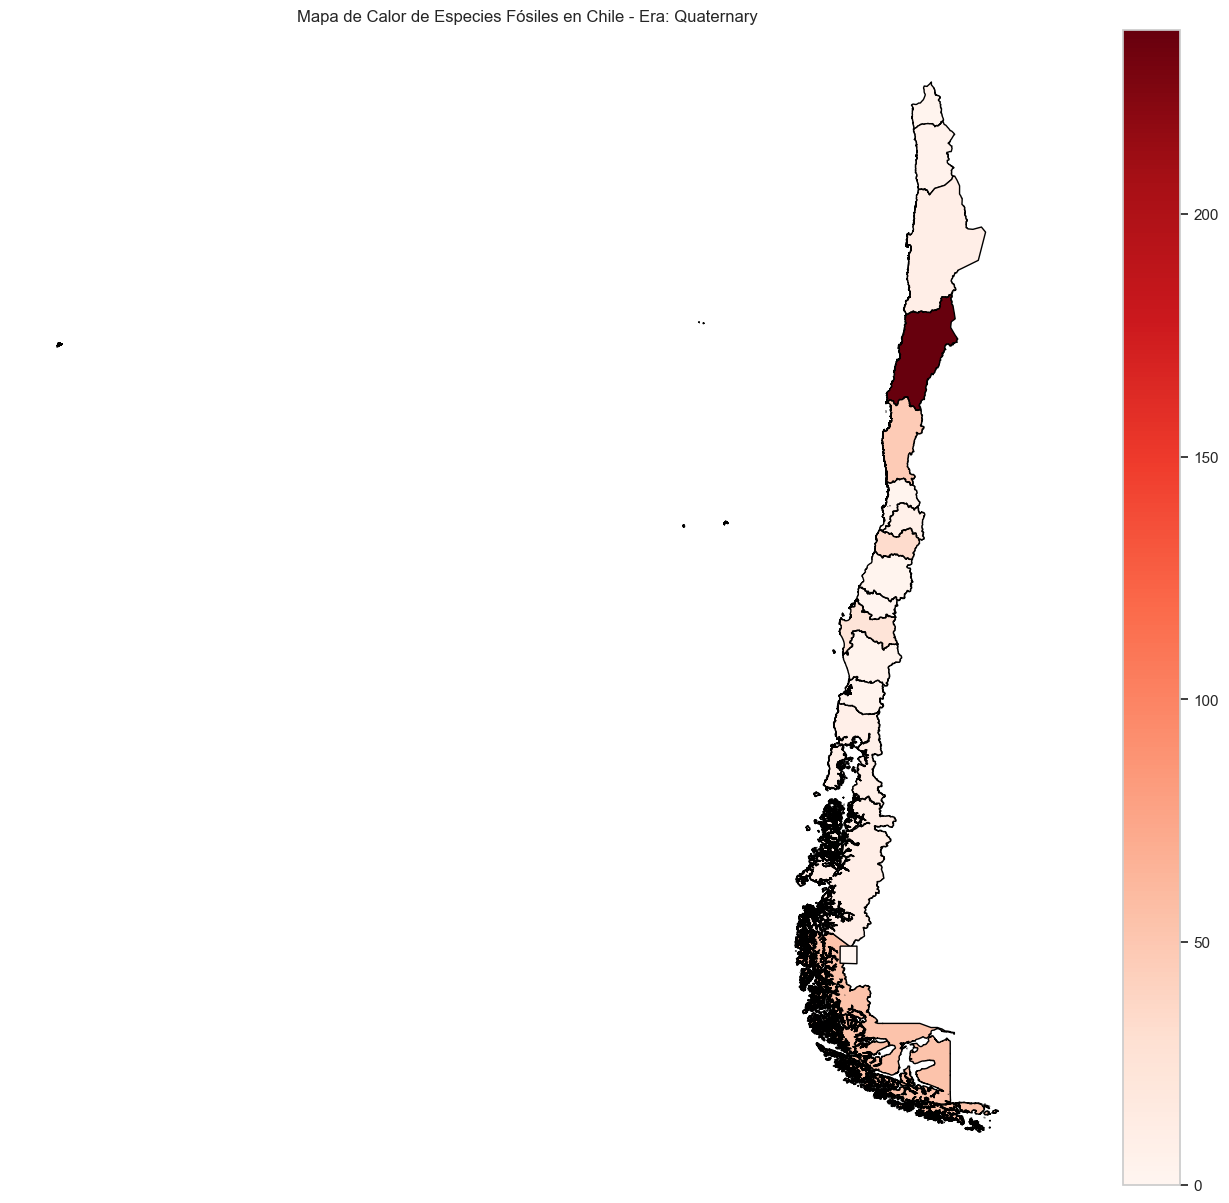

Datos combinados para la era Triassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               50.0
3    Región de Magallanes y Antártica Chilena                0.0
4   Región de Aysén del Gral.Ibañez del Campo                1.0
5                           Región de Atacama              124.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                4.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                5.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío               43.0
13                            Región de Ñuble      

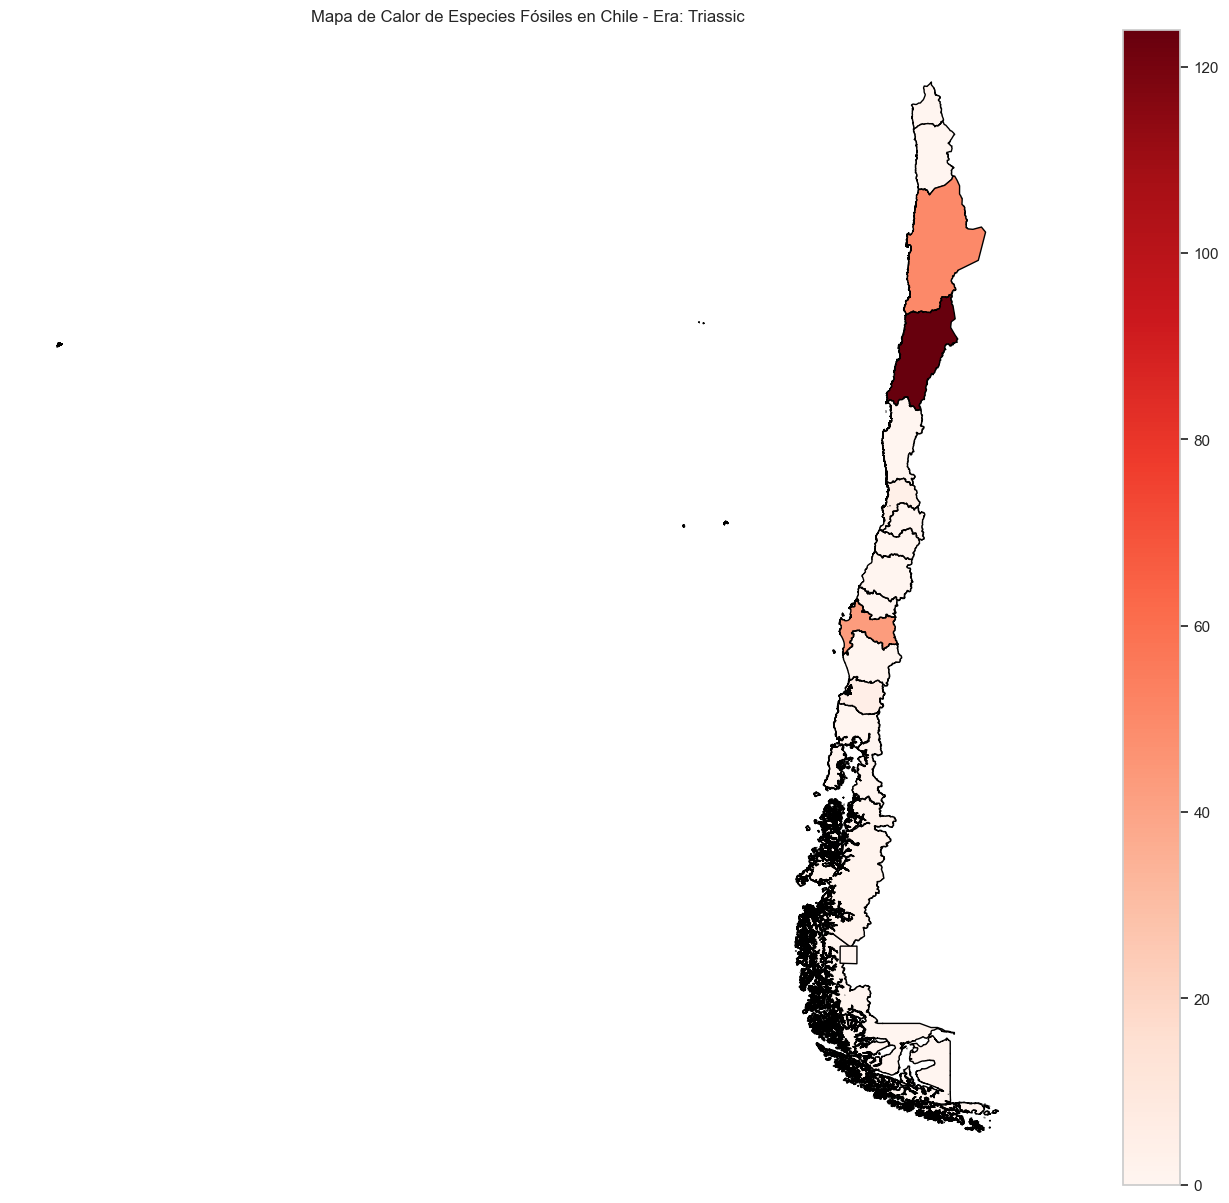

In [208]:
paises = gpd.read_file(shapefile_path).to_crs(4326)

df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

paises = paises.rename(columns={'Region': 'region'})

paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

for era in top_5_eras_chile['era_early']:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    
    merged = paises.merge(distribucion_era, on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['region', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Chile - Era: {era}')
    ax.set_axis_off()

    plt.show()

viendo los mapas de calor que top 5 eras de chile las cuales son (jurasic,neogene,cretaceous,quaternary y triassic)  vemos una tendencia clara en el norte del pais en especial en la Region de Atacama.

Ahora haremos los mapas para las top 5 eras en Argentina

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Paleogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              765.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja                8.0
5                                           Catamarca               26.0
6                                             Tucumán                8.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz              999.0
10                                             Chubut             3092.0
11                                            Mendoza               77.0
12         

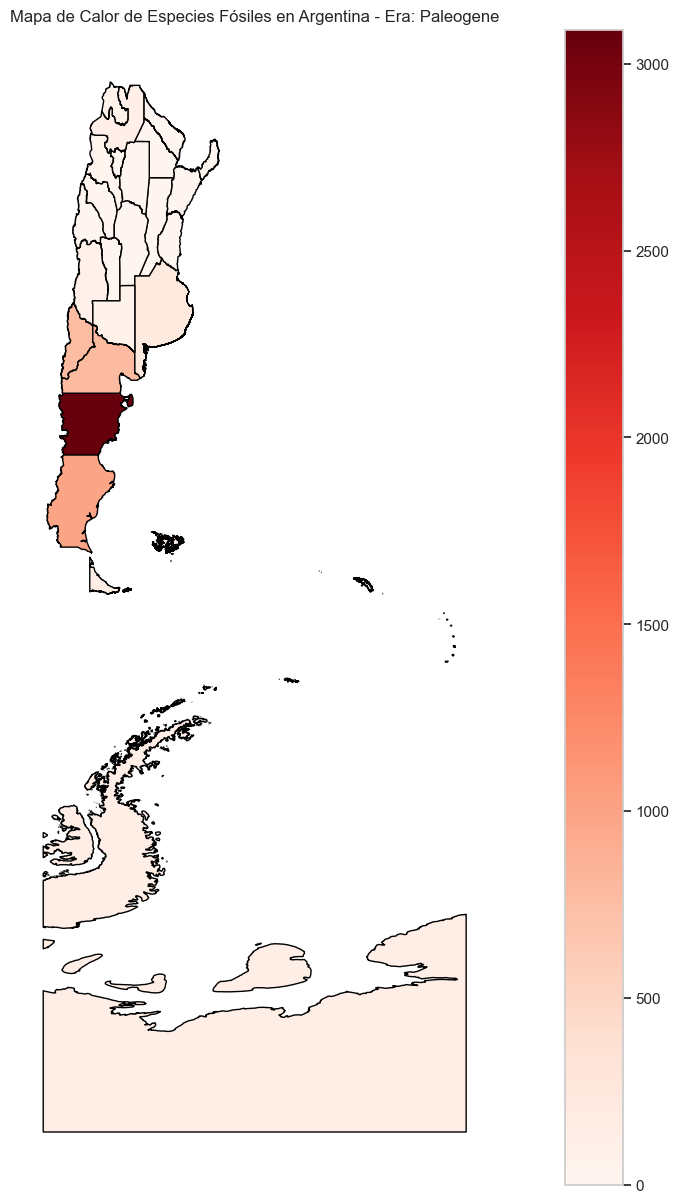

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Neogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén               85.0
2                                            San Luis               17.0
3                                            Santa Fe              227.0
4                                            La Rioja               64.0
5                                           Catamarca              353.0
6                                             Tucumán               27.0
7                                               Chaco                4.0
8                                             Formosa                0.0
9                                          Santa Cruz             1623.0
10                                             Chubut              703.0
11                                            Mendoza               88.0
12           

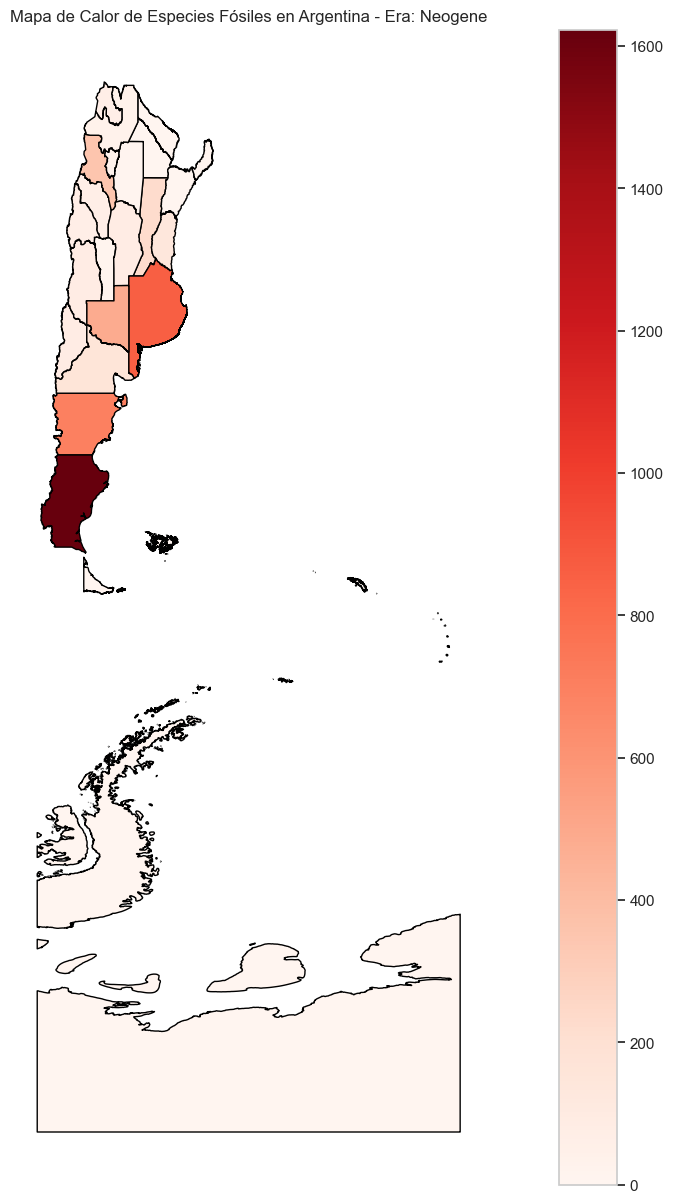

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Cretaceous:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén             1612.0
2                                            San Luis               91.0
3                                            Santa Fe                0.0
4                                            La Rioja                3.0
5                                           Catamarca                0.0
6                                             Tucumán               15.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz             1832.0
10                                             Chubut             1282.0
11                                            Mendoza              391.0
12        

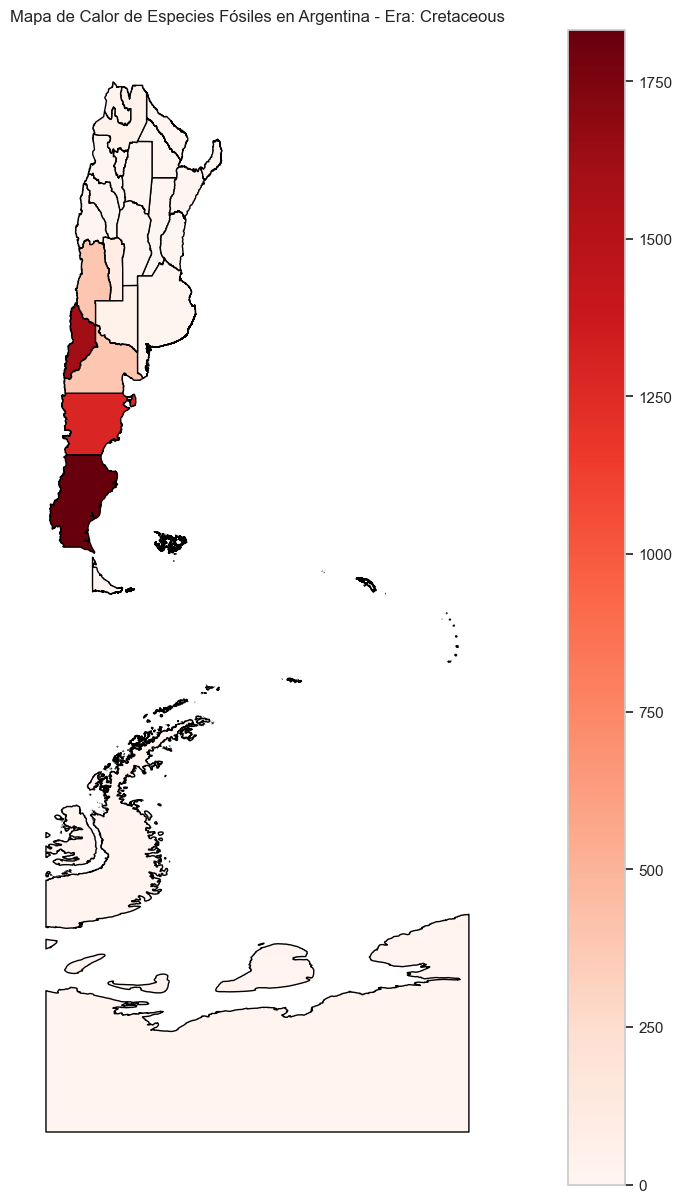

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Ordovician:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén                0.0
2                                            San Luis               12.0
3                                            Santa Fe                0.0
4                                            La Rioja              216.0
5                                           Catamarca               74.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz                0.0
10                                             Chubut                0.0
11                                            Mendoza               95.0
12        

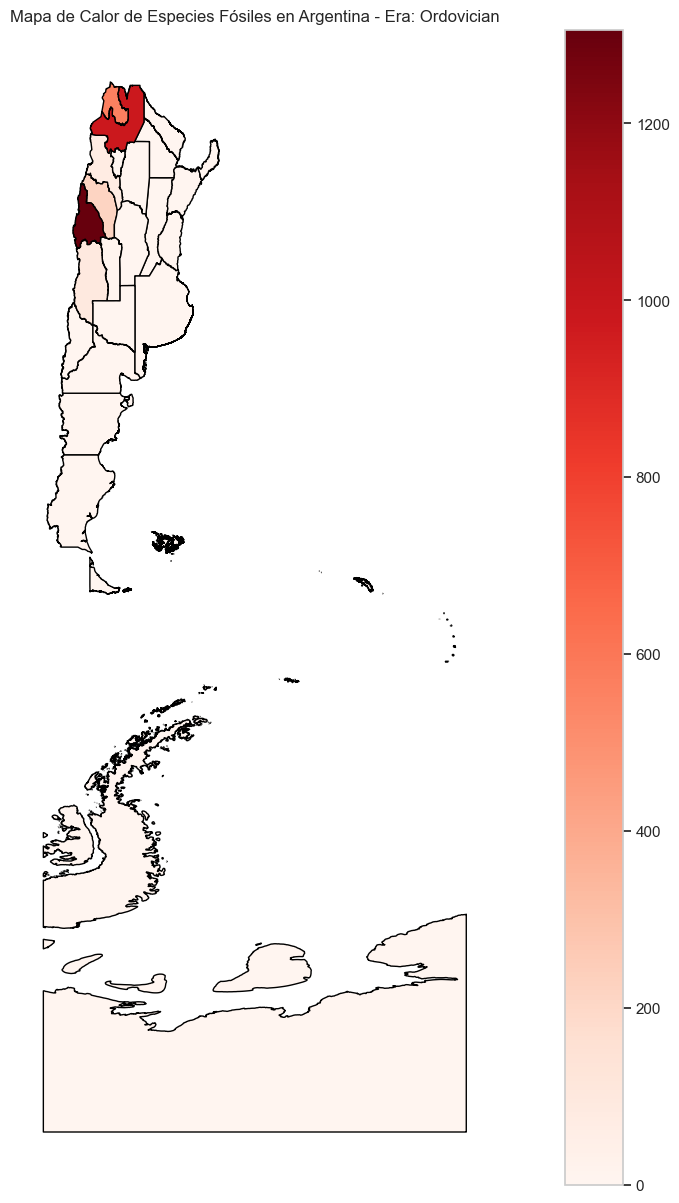

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Jurassic:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              936.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja                0.0
5                                           Catamarca                0.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz               93.0
10                                             Chubut              196.0
11                                            Mendoza              720.0
12          

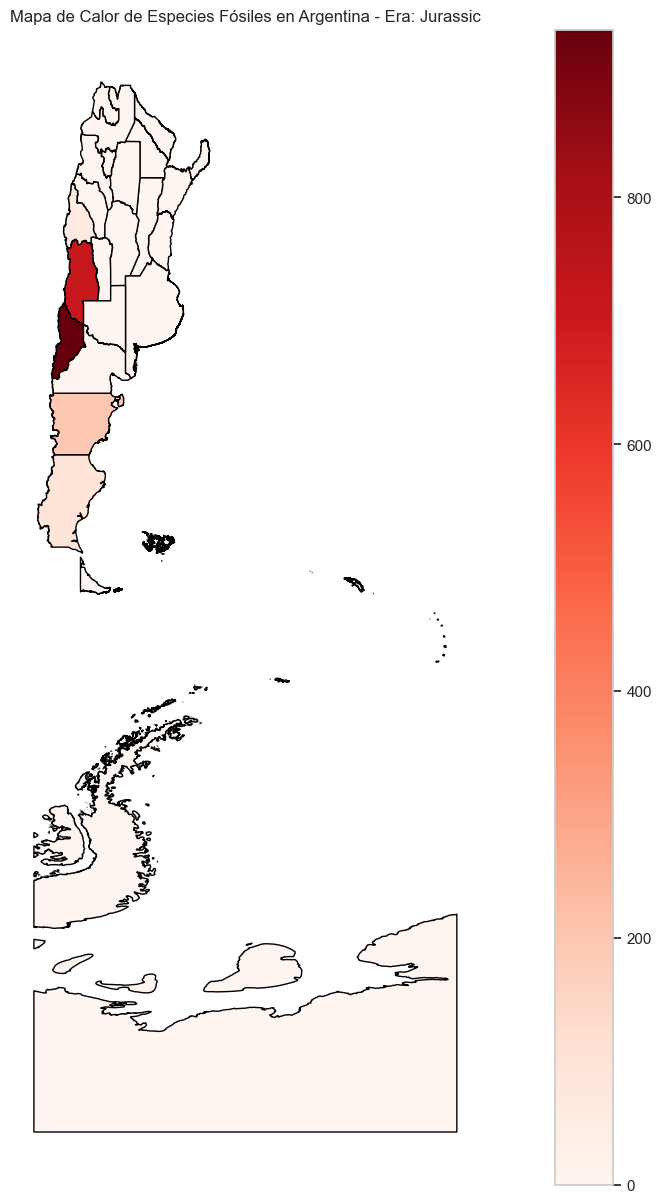

In [209]:
provincias = gpd.read_file(shapefile_path_pro).to_crs(4326)
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

provincias['nam'] = provincias['nam'].astype(str)

for era in top_5_eras_argentina['era_early']:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    distribucion_era['region'] = distribucion_era['region'].astype(str)

    merged = provincias.merge(distribucion_era, left_on='nam', right_on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['nam', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Argentina - Era: {era}')
    ax.set_axis_off()

    plt.show()

Y ahora tambien lo haremos con Antartica pero un poco diferente , en este caso lo haremos con un scatter plot.

Eras únicas en el top 5: ['Cretaceous' 'Jurassic' 'Paleogene' 'Cambrian' 'Quaternary']


C:\Users\octah\AppData\Local\Temp\ipykernel_16324\3684258495.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_eras))


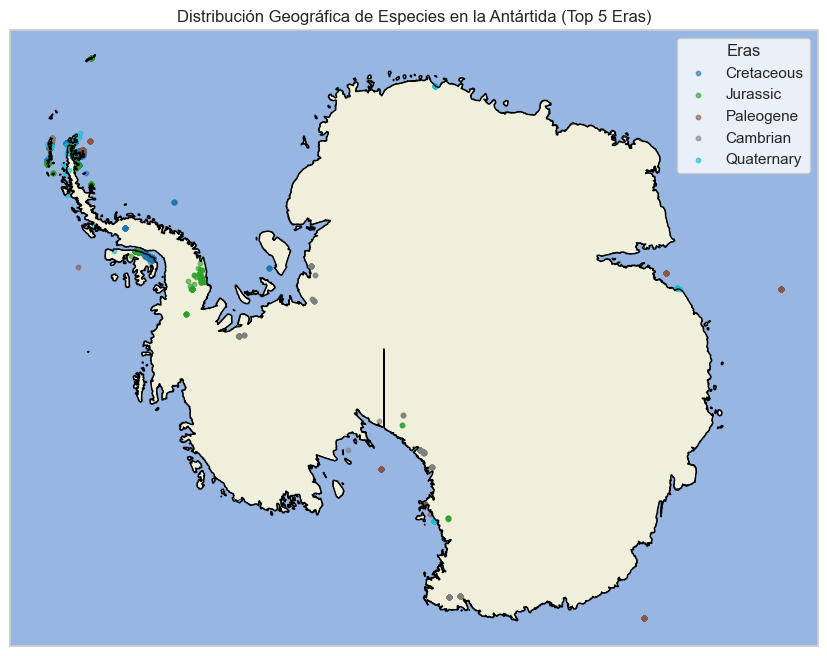

In [210]:
top_5_eras_antartica = ['Cretaceous', 'Paleogene', 'Jurassic', 'Cambrian', 'Quaternary']

antartica_top5 = antartica_df[antartica_df['era_early'].isin(top_5_eras_antartica)]

unique_eras = antartica_top5['era_early'].unique()
print("Eras únicas en el top 5:", unique_eras)

colors = plt.cm.get_cmap('tab10', len(unique_eras))  
era_colors = {era: colors(i) for i, era in enumerate(unique_eras)}

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

for era in unique_eras:
    subset = antartica_top5[antartica_top5['era_early'] == era]
    ax.scatter(subset['lng'], subset['lat'], color=era_colors[era], alpha=0.6, s=10,
               label=era, transform=ccrs.PlateCarree())

plt.legend(title='Eras', loc='upper right')

plt.title('Distribución Geográfica de Especies en la Antártida (Top 5 Eras)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

en la punta es donde se ubica la mayoria de centros cientificos (la mayoria chilenos) 

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\2938244967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Quaternary:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                8.0
1                                             Neuquén                0.0
2                                            San Luis                2.0
3                                            Santa Fe               70.0
4                                            La Rioja                0.0
5                                           Catamarca               27.0
6                                             Tucumán               37.0
7                                               Chaco               26.0
8                                             Formosa                8.0
9                                          Santa Cruz               26.0
10                                             Chubut               15.0
11                                            Mendoza               35.0
12        

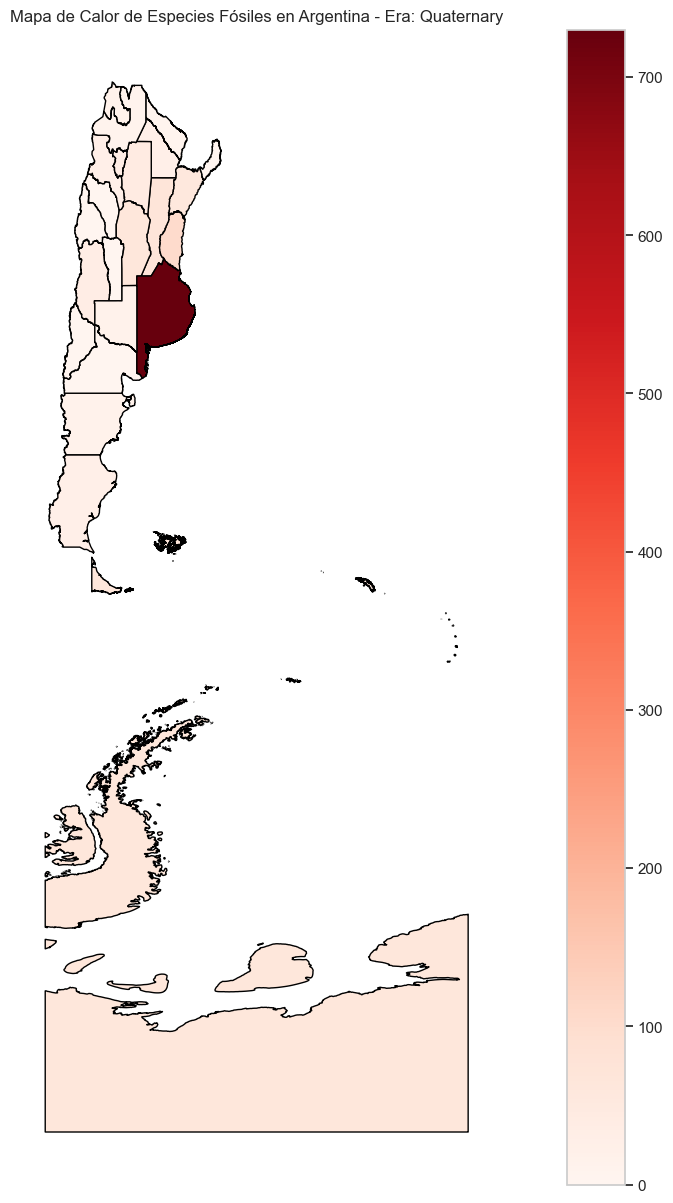

C:\Users\octah\AppData\Local\Temp\ipykernel_16324\2938244967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Triassic:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén               59.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja              155.0
5                                           Catamarca                0.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz                7.0
10                                             Chubut                0.0
11                                            Mendoza              306.0
12          

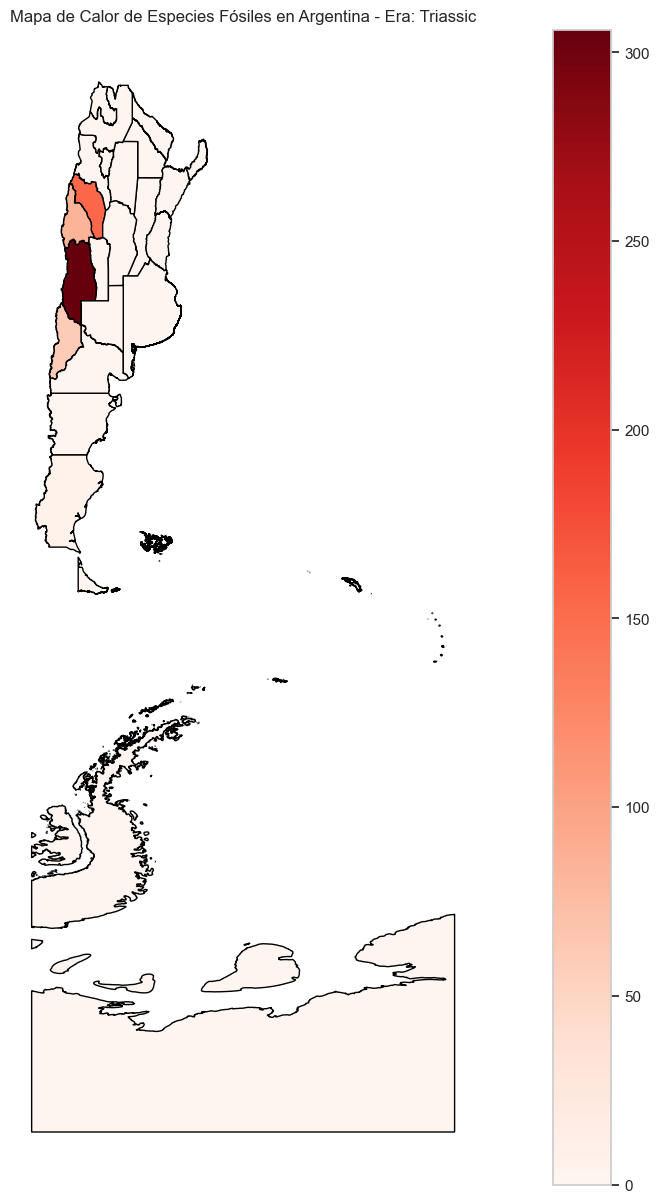

In [211]:
eras = ['Quaternary', 'Triassic']
for era in eras:
    # Filtrar los datos para la era actual
    distribucion_era = distribucion[distribucion['era_early'] == era]
    distribucion_era['region'] = distribucion_era['region'].astype(str)

    # Realizar la fusión con el DataFrame de provincias
    merged = provincias.merge(distribucion_era, left_on='nam', right_on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['nam', 'total_ocurrencias']])

    # Crear el mapa
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Argentina - Era: {era}')
    ax.set_axis_off()

    plt.show()

Análisis de la Distribución de Especies Fósiles
1. Jurassic
Chile: Las ocurrencias son variadas, con regiones como Antofagasta y la Región Metropolitana mostrando números significativos (655 y 410, respectivamente).
Argentina: Aquí, Neuquén presenta un número alto de 1090 ocurrencias, lo que sugiere una rica biodiversidad en esta era. Sin embargo, muchas provincias de Argentina reportan cero ocurrencias.
2. Neogene
Chile: La región de Aysén destaca con 487 ocurrencias, pero la distribución es desigual, con algunas regiones mostrando cero fósiles.
Argentina: Santa Cruz y Chubut tienen cifras elevadas (1752 y 853), indicando una concentración de fósiles en el sur del país. Esto podría relacionarse con la geografía y la historia geológica de la provincia.
3. Cretaceous
Chile: La región de Atacama es notable con 4338 ocurrencias, lo que la convierte en un punto caliente para esta era. Otras regiones como Antofagasta y Magallanes también tienen cifras relevantes.
Argentina: Neuquén y Santa Cruz son las más destacadas con 1995 y 2069 ocurrencias. La alta cantidad en estas provincias sugiere condiciones favorables para la preservación de fósiles.
4. Paleogene:
Chile: Región de Magallanes y Antártica Chilena es la región con el mayor número (72)
Argentina: Chubut es la provincia con el mayor número (3869), lo que indica un potencial alto de biodiversidad en el pasado.
5. Ordovician:
Chile: En la Región de Atacama con un total (26) de ocurrencias y lo curioso es que en esta era el total de ocurrencia en todo el pais es 26.
Argentina: La provincia de Salta tiene 995 ocurrencias, lo que sugiere una rica diversidad de fósiles de esta era, mientras que otras regiones presentan escasez.
6. Quaternary:
Chile:Región de Atacama con (251) ocurrencias es la mayor region en esta era
Argentina: Buenos Aires (908) es la provincia con mas ocurrencias y con mucha diferencia con el segundo
7. Triassic:
Chile:Región de Atacama (135) es la region con mas ocurrencias y tambien vemos que solo hay 3 regiones con ocurrencias.
Argentina: Mendoza (342) es la provincia con mas ocurrencias y aca no hay tanta diferencia y vemos que hay una tendecia clara a que las provincias con mas ocurrencias en esta era son las que estan mas cerca de la frontera con Chile.

Conclusiones Generales
Concentración Regional: Tanto en Chile como en Argentina, hay regiones específicas que destacan por su riqueza en fósiles, como Atacama en Chile y Chubut en Argentina. Esto señala la importancia de ciertas áreas geográficas en la preservación de la biodiversidad a lo largo del tiempo.
Desigualdad en la Distribución: Las cifras muestran una gran disparidad en la cantidad de fósiles entre diferentes regiones y entre los dos países, lo que puede reflejar factores como la erosión, la sedimentación, y la actividad tectónica.
Implicaciones Ecológicas: Las altas concentraciones de fósiles en ciertas eras y regiones sugieren que estos ecosistemas eran particularmente favorables para la vida en esos momentos, a menudo debido a condiciones climáticas y geológicas específicas.
Este análisis resalta la complejidad de la evolución de las especies en el tiempo y el espacio, y cómo la geografía actual puede influir en la distribución de fósiles antiguos.

# ¿Existen similitudes en la distribución de especies fósiles entre las costas de Chile y Argentina durante perídos geológicos específicos?

## **Enfoque y Objetivo**

En este análisis, buscamos explorar la biodiversidad fósil en las costas de Chile y Argentina, centrándonos en las similitudes y diferencias en la distribución de especies fósiles durante diferentes eras geológicas.  

Para ello, adoptamos un enfoque estructurado que incluye:  
1. **Filtrar datos fósiles costeros** para eliminar información irrelevante de zonas continentales.  
2. **Estudiar la diversidad fósil** en términos de riqueza y similitud entre especies por eras geológicas.  
3. **Aplicar índices de similitud**, como el índice de Jaccard, para medir la relación entre las especies compartidas y únicas de cada región.  

Este enfoque nos permitirá:  
- Cuantificar la similitud entre ambas regiones costeras utilizando un método riguroso.  
- Contextualizar los resultados en un marco geológico e histórico para entender los factores detrás de las diferencias observadas.  

---

## **Índice de Jaccard: Fundamentación y Uso**

El índice de Jaccard es una métrica utilizada para evaluar la similitud entre dos conjuntos, considerando las especies compartidas y las únicas. Se define como:  


$$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

Donde:  
- $|A \cap B| $: Número de especies comunes entre las costas de Chile y Argentina.  
- $|A \cup B| $: Número total de especies únicas combinadas en ambas costas.  

### **Interpretación del Índice de Jaccard**
- **Valores cercanos a 0**: Baja similitud; pocas especies compartidas.  
- **Valores cercanos a 1**: Alta similitud; muchas especies compartidas.  

**¿Por qué usar el índice de Jaccard en este caso?**  
- Es ideal para comparar conjuntos discretos, como listas de especies fósiles.  
- Permite cuantificar la similitud entre dos regiones y evaluar si existe una conexión biológica significativa entre sus comunidades fósiles.

---

### **1. Preparación de los Datos**
- **Objetivo:** Filtrar los datos fósiles para enfocarse únicamente en las regiones costeras de Chile y Argentina.  

In [212]:
# Chile: Costas están entre el Océano Pacífico, longitud < -70.
chile_costas = chile_df[chile_df['lng'] < -70]

# Argentina: Costas están entre el Océano Atlántico, longitud > -65.
argentina_costas = argentina_df[argentina_df['lng'] > -65]

# Imprimir la cantidad de registros encontrados en las costas de cada país
print(f"Registros en las costas de Chile: {len(chile_costas)}")
print(f"Registros en las costas de Argentina: {len(argentina_costas)}")


Registros en las costas de Chile: 6642
Registros en las costas de Argentina: 3858


### **2. Análisis de Diversidad por Era Geológica**
- **Objetivo:** Evaluar la cantidad de especies únicas presentes en las costas de cada país en cada era geológica.  

In [213]:
# Contar el número de especies únicas en las costas de Chile y Argentina
unique_species_chile_costas = chile_costas['species_name'].nunique()
unique_species_argentina_costas = argentina_costas['species_name'].nunique()

# Imprimir los resultados
print(f"Especies únicas en las costas de Chile: {unique_species_chile_costas}")
print(f"Especies únicas en las costas de Argentina: {unique_species_argentina_costas}")

Especies únicas en las costas de Chile: 1104
Especies únicas en las costas de Argentina: 909


In [214]:
# Identificar las especies compartidas y únicas en las costas de cada país
chile_coastal_species = set(chile_costas['species_name'])
argentina_coastal_species = set(argentina_costas['species_name'])

# Especies compartidas entre las costas
shared_coastal_species = chile_coastal_species.intersection(argentina_coastal_species)
# Especies únicas en Chile
unique_to_chile = chile_coastal_species - argentina_coastal_species
# Especies únicas en Argentina
unique_to_argentina = argentina_coastal_species - chile_coastal_species

# Imprimir los resultados de especies compartidas y únicas
print(f"Especies compartidas entre las costas: {len(shared_coastal_species)}")
print(f"Especies únicas en las costas de Chile: {len(unique_to_chile)}")
print(f"Especies únicas en las costas de Argentina: {len(unique_to_argentina)}")


Especies compartidas entre las costas: 119
Especies únicas en las costas de Chile: 985
Especies únicas en las costas de Argentina: 790


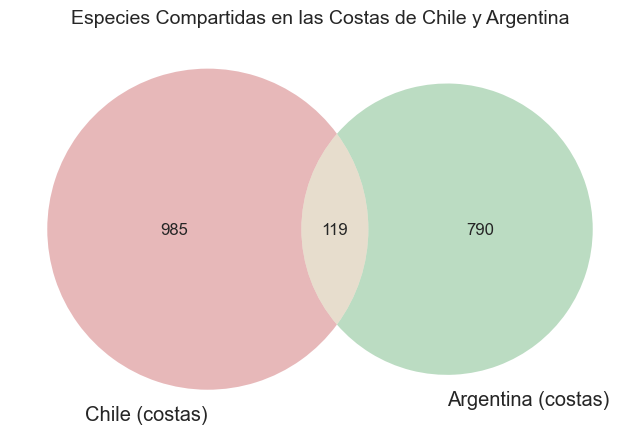

In [215]:
from matplotlib_venn import venn2

# Crear diagrama de Venn
plt.figure(figsize=(8, 6))
venn = venn2([chile_coastal_species, argentina_coastal_species], ('Chile (costas)', 'Argentina (costas)'))
plt.title("Especies Compartidas en las Costas de Chile y Argentina", fontsize=14)
plt.show()


Como podemos apreciar aunque Chile y Argentina sean paises vecinos no comparten un numero muy grande de especies fosiles y esto se puede deber a muchos factores tales como el medioambiente o el clima, ya que estos factores son muy determinantes a la hora de la evolucion, lo que puede hacer "cambiar las especias", por otro lado como estos paises estan "divididos" por la Cordillera de los Andes esto pudo haber dificultado migraciones de estos animales dificultando aun mas que en estos paises hayan fosiles de las mismas especies

---

### **3. Visualización de la Diversidad**
- **Objetivo:** Representar gráficamente la diversidad fósil de cada país por era geológica para facilitar la interpretación de los datos.  


In [216]:
# Agrupar los datos de Chile y Argentina por la columna 'era_early' y contar el número de especies únicas en cada era
species_by_era_chile_costas = chile_costas.groupby('era_early')['species_name'].nunique()
species_by_era_argentina_costas = argentina_costas.groupby('era_early')['species_name'].nunique()

print("\nEspecies por era geológica en las costas de Chile:")
print(species_by_era_chile_costas)

print("\nEspecies por era geológica en las costas de Argentina:")
print(species_by_era_argentina_costas)


Especies por era geológica en las costas de Chile:
era_early
Carboniferous      2
Cretaceous       235
Jurassic         299
Neogene          450
Ordovician         1
Paleogene         74
Paleozoic          1
Permian            3
Quaternary       151
Triassic          50
Name: species_name, dtype: int64

Especies por era geológica en las costas de Argentina:
era_early
Cambrian          20
Carboniferous     10
Cretaceous         3
Neogene          593
Ordovician        48
Paleogene         73
Permian           21
Quaternary       249
Name: species_name, dtype: int64


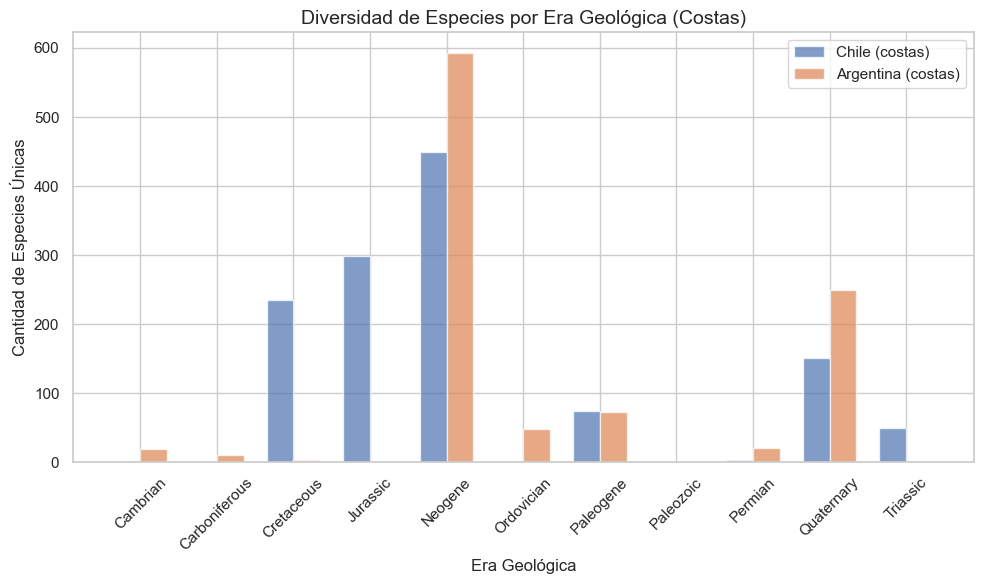

In [217]:
import seaborn as sns

# Establecer el estilo de los gráficos a "whitegrid" para mejorar la visualización
sns.set(style="whitegrid")

# Crear un DataFrame con los datos de especies por era geológica para Chile y Argentina
data = pd.DataFrame({
    "Chile (costas)": species_by_era_chile_costas,
    "Argentina (costas)": species_by_era_argentina_costas
}).fillna(0)

# Definir la posición de las barras en el eje x
x = np.arange(len(data.index))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width / 2, data["Chile (costas)"], width=width, label='Chile (costas)', alpha=0.7)

plt.bar(x + width / 2, data["Argentina (costas)"], width=width, label='Argentina (costas)', alpha=0.7)

plt.title("Diversidad de Especies por Era Geológica (Costas)", fontsize=14)
plt.xlabel("Era Geológica", fontsize=12)
plt.ylabel("Cantidad de Especies Únicas", fontsize=12)
plt.xticks(x, data.index, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()



---

### **4. Cálculo del Índice de Jaccard**
- **Objetivo:** Cuantificar la similitud entre las especies fósiles de las costas de Chile y Argentina en cada era.  

In [218]:
# Contar el número de especies compartidas entre las costas de Chile y Argentina
shared_coastal_species_count = len(shared_coastal_species)

# Se utiliza la unión de ambos conjuntos para obtener todas las especies únicas
total_coastal_species_count = len(chile_coastal_species.union(argentina_coastal_species))

# Calcular el índice de Jaccard como la razón entre las especies compartidas y el total de especies
jaccard_index_coastal = shared_coastal_species_count / total_coastal_species_count

print(f"Índice de Jaccard (costas): {jaccard_index_coastal:.2f}")

Índice de Jaccard (costas): 0.06


Como se puede apreciar un índice bajo (como el obtenido, 0.06) indica que las costas de Chile y Argentina comparten pocas especies fósiles, lo cual puede deberse a:  
- Barreras geográficas (como la Cordillera de los Andes).  
- Diferencias ambientales entre ambas regiones.  
- Sesgos en los registros fósiles disponibles.

### **Conclusión del Análisis**:

1. **Diversidad de Especies Fósiles:**
   - La costa de Chile presenta un total de **1132 especies únicas**, mientras que la de Argentina contiene **950 especies únicas**. Esto sugiere que la costa chilena tiene una mayor diversidad de especies fósiles registrada en los datos analizados.

2. **Similitudes entre Regiones:**
   - Se identificaron **126 especies compartidas** entre las costas de Chile y Argentina. Este número representa una fracción relativamente baja en comparación con las especies únicas de cada región, lo que indica que, aunque existe cierta similitud, la biodiversidad fósil entre ambas costas tiene características distintivas.

3. **Índice de Jaccard:**
   - Al aplicar el **índice de Jaccard**, se observó que existe una cantidad limitada de especies fósiles compartidas entre ambas regiones costeras (126 especies comunes). Esto se traduce en un valor relativamente bajo del índice, lo que indica una similitud biológica moderada entre las comunidades fósiles de ambos países.
   es fósiles.

5. **Factores Geológicos y Ambientales:**
   - La baja cantidad de especies compartidas puede estar relacionada con factores geográficos, como la separación por la cordillera de los Andes, y con diferencias en las condiciones paleoambientales de cada región durante los períodos analizados. Esto sugiere que los ecosistemas fósiles costeros de Chile y Argentina experimentaron procesos evolutivos y ecológicos independientes en gran parte de su historiados estudiados. Chile, con su proximidad al Océano Pacífico y una geografía influenciada por la actividad tectónica, podría haber ofrecido un entorno distinto al de las costas argentinas, que están influenciadas por el Océano Atlántico.

---


### **Conclusión Final**
En resumen, la distribución de las especies fósiles en las costas de Chile y Argentina refleja tanto las particularidades biológicas de cada región como los procesos históricos y geológicos que moldearon su biodiversidad. Aunque se identificaron ciertas similitudes, predominan las diferencias, lo que sugiere que las costas de ambos países actuaron como ecosistemas relativamente independientes a lo largo de la historia geológica. Este análisis no solo aporta información relevante sobre el pasado biológico de Sudamérica, sino que también sienta las bases para futuros estudios paleontológicos y biogeográficos en la región.

---

## ¿Cómo  se  distribuyen  las  especies  fósiles  en  las  tres  regiones  según  sus  hábitos alimenticios, y qué nos puede decir esto sobre la estructura ecológica de la región en diferentes períodos geológicos?